## Problem Statement

### Context

As an analyst at ABC Estate Wines, we are presented with historical data encompassing the sales of different types of wines throughout the 20th century. These datasets originate from the same company but represent sales figures for distinct wine varieties. Our objective is to delve into the data, analyze trends, patterns, and factors influencing wine sales over the course of the century. By leveraging data analytics and forecasting techniques, we aim to gain actionable insights that can inform strategic decision-making and optimize sales strategies for the future.

### Objective:

The primary objective of this project is to analyze and forecast wine sales trends for the 20th century based on historical data provided by ABC Estate Wines. We aim to equip ABC Estate Wines with the necessary insights and foresight to enhance sales performance, capitalize on emerging market opportunities, and maintain a competitive edge in the wine industry.

# Importing necessary libraries

In [7]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# To display multiple dataframes from one cell
from IPython.display import display

# To perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# To build a logistic regression model
from sklearn.linear_model import LinearRegression

#To build exponential smoothening models
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# To visualize ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# To build ARIMA model
from statsmodels.tsa.arima.model import ARIMA

#  To perform date arithmetic, allowing easy calculations and manipulations
from dateutil.relativedelta import relativedelta


# To evaluate the performance of the model
from sklearn.metrics import mean_squared_error

## This is to display multiple data frames from one cell
from IPython.display import display

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics #model performance metrics
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

# Data Overview & EDA

## Loading the data

In [10]:
import os
path = os.getcwd() + '\\Sparkling.csv'
data = pd.read_csv(path)
df1 = data.copy()

In [11]:
print('First few rows of Data')
display(df1.head())
print('Last few rows of Data')
display(df1.tail())

First few rows of Data


YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

Last few rows of Data


YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

## Read the data as appropriate time-series data

In [13]:
TimeStamp= pd.date_range(start='1/1/1980',end='8/1/1995',freq='M')
TimeStamp

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='ME')

In [14]:
df1['TimeStamp'] = TimeStamp
df1.head()

YearMonth  Sparkling  TimeStamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [15]:
df1.set_index(keys='TimeStamp', inplace=True)
df1.drop(['YearMonth'], axis=1, inplace=True)

In [16]:
df1.rename(columns={'Sparkling':'SparklingWine_Sales'}, inplace=True)

In [17]:
df1.head() #first 5 rows of the dataset

SparklingWine_Sales
TimeStamp                      
1980-01-31                 1686
1980-02-29                 1591
1980-03-31                 2304
1980-04-30                 1712
1980-05-31                 1471

In [18]:
df1.tail() #last 5 rows of the dataset

SparklingWine_Sales
TimeStamp                      
1995-03-31                 1897
1995-04-30                 1862
1995-05-31                 1670
1995-06-30                 1688
1995-07-31                 2031

In [19]:
print('Shape of dataset: ',df1.shape) #shape of the dataset i.e. no. of rows & columns

Shape of dataset:  (187, 1)


In [20]:
df1.info() #datatypes in the dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SparklingWine_Sales  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [21]:
df1.describe(include='all').T #statistics of the data

count         mean         std     min     25%     50%  \
SparklingWine_Sales  187.0  2402.417112  1295.11154  1070.0  1605.0  1874.0   

                        75%     max  
SparklingWine_Sales  2549.0  7242.0

In [22]:
#Check for null values
print('Null values:-\n')
display(df1.isnull().sum())
display(df1[df1.isnull().values])

Null values:-



SparklingWine_Sales    0
dtype: int64

Empty DataFrame
Columns: [SparklingWine_Sales]
Index: []

### Missing value treatment

In [24]:
# Not required

# Exploratory Data Analysis

### Plot data for Wine-sales over time (months-years)

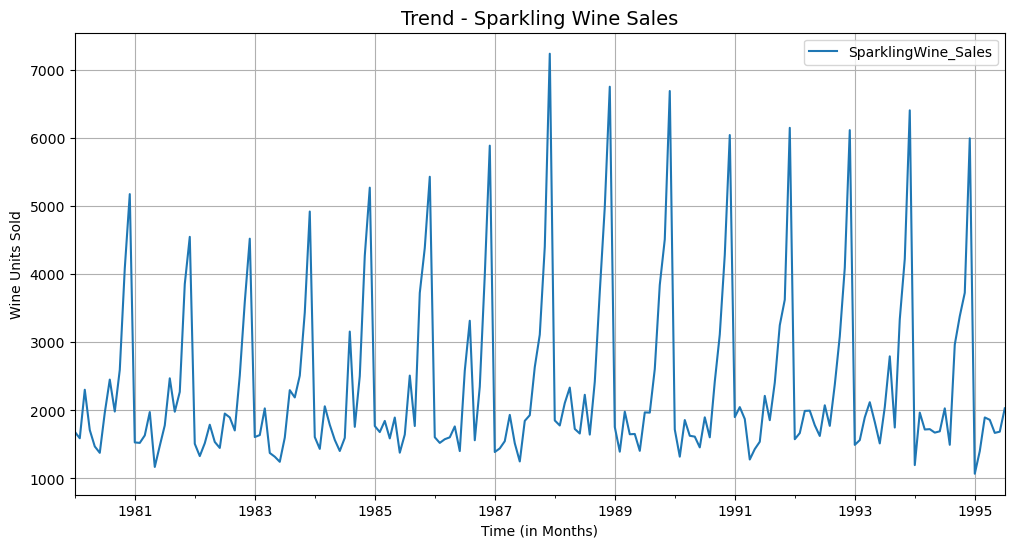

In [27]:
df = df1.copy()

rcParams['figure.figsize'] = 12,6
df.plot(grid=True);
plt.title('Trend - Sparkling Wine Sales', fontsize=14)
plt.xlabel('Time (in Months)',fontsize=10)
plt.ylabel('Wine Units Sold',fontsize=10)
plt.show()

### Plot a boxplot to understand the sales across different years

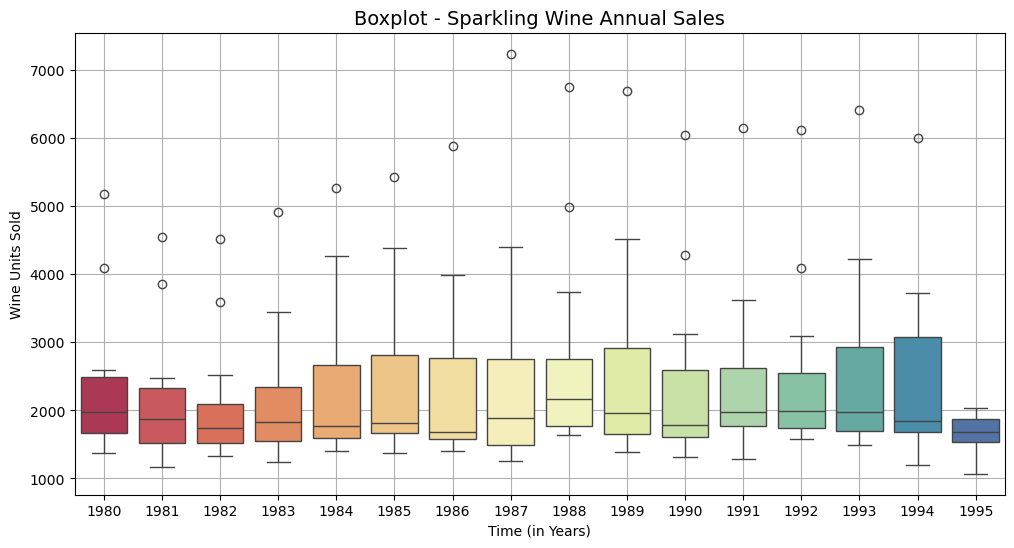

In [29]:
sns.boxplot(data=df, x=df.index.year, y='SparklingWine_Sales', palette="Spectral")
plt.title('Boxplot - Sparkling Wine Annual Sales', fontsize=14)
plt.xlabel('Time (in Years)',fontsize=10)
plt.ylabel('Wine Units Sold',fontsize=10)
plt.grid()
plt.show();

### Plot a boxplot to understand the sales at month level

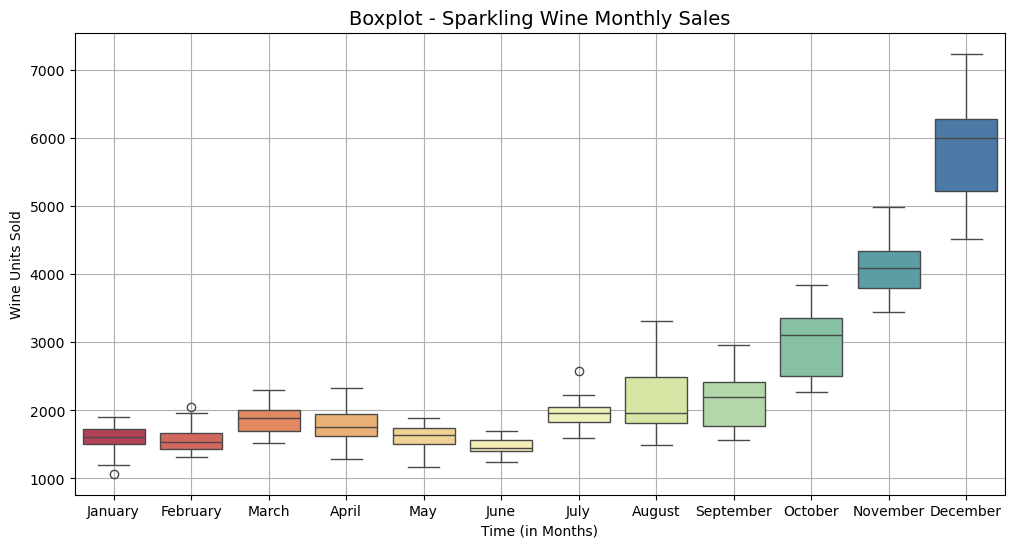

In [31]:
sns.boxplot(data=df, x=df.index.month_name(), y='SparklingWine_Sales', palette="Spectral")
plt.title('Boxplot - Sparkling Wine Monthly Sales', fontsize=14)
plt.xlabel('Time (in Months)',fontsize=10)
plt.ylabel('Wine Units Sold',fontsize=10)
plt.grid()
plt.show();

### Plot a time series monthplot to understand the spread

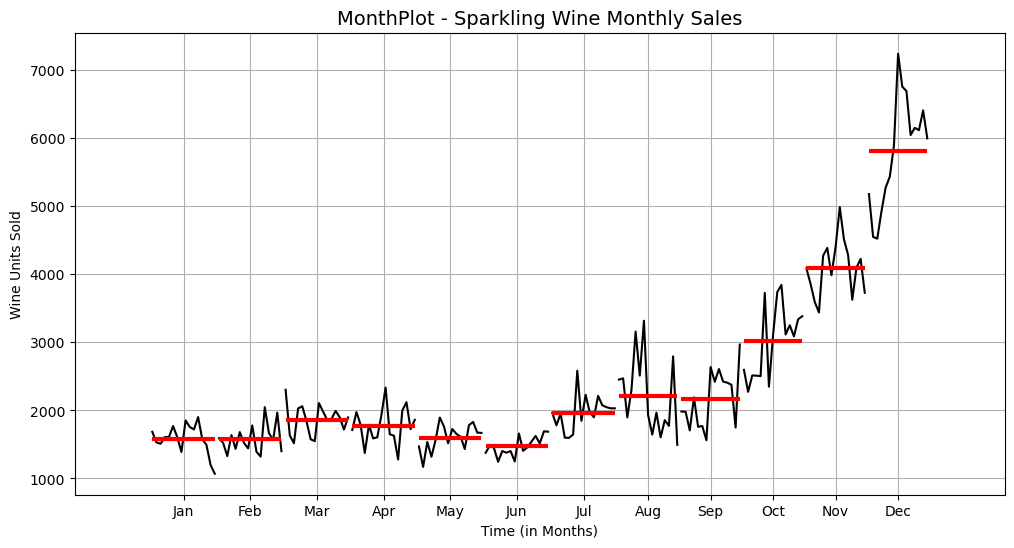

In [33]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['SparklingWine_Sales'])
plt.title('MonthPlot - Sparkling Wine Monthly Sales', fontsize=14)
plt.xlabel('Time (in Months)',fontsize=10)
plt.ylabel('Wine Units Sold',fontsize=10)
plt.grid();

### Create a pivot table to display monthly price across years

In [35]:
monthly_sales_across_years = pd.pivot_table(df, values = 'SparklingWine_Sales', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

TimeStamp      1       2       3       4       5       6       7       8   \
TimeStamp                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

TimeStamp      9       10      11      12  
TimeStamp                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

Text(0, 0.5, 'Wine Units Sold')

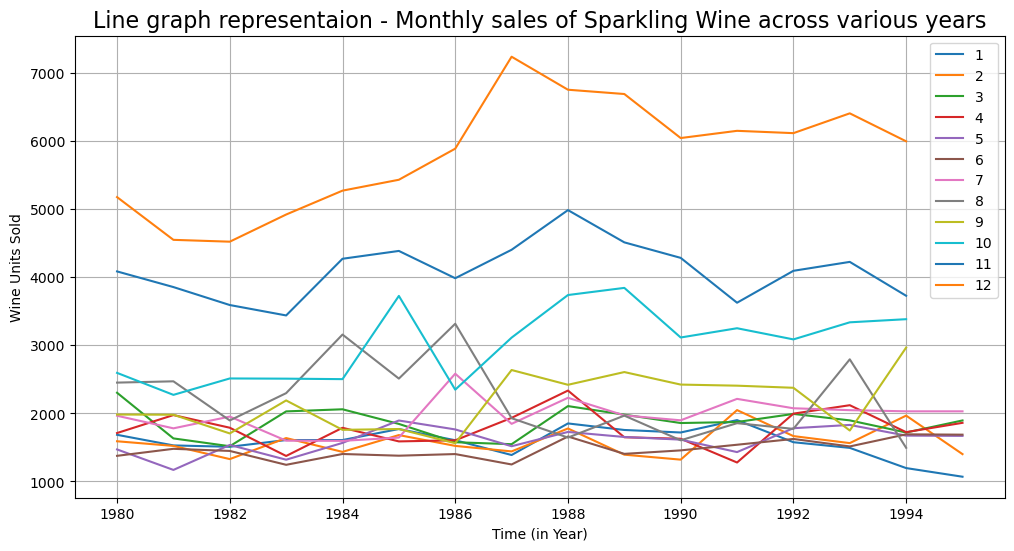

In [36]:
monthly_sales_across_years.plot()
plt.grid()
plt.title('Line graph representaion - Monthly sales of Sparkling Wine across various years', fontsize=16)
plt.legend(loc='best');
plt.xlabel('Time (in Year)')
plt.ylabel('Wine Units Sold')

### Plot the Empirical Cumulative Distribution Function

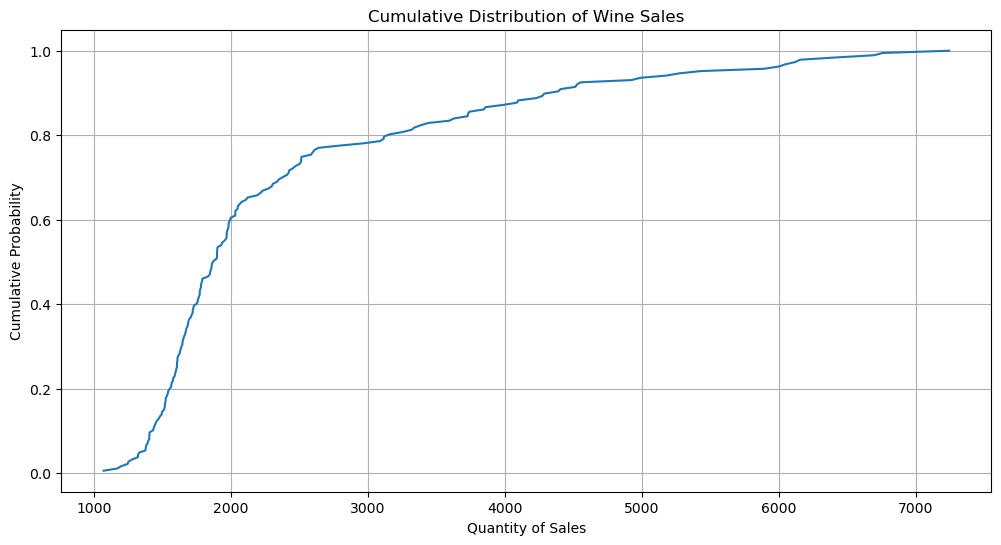

In [38]:
#ECDF - Adds up the number of observations that are there for a certain value
from statsmodels.distributions.empirical_distribution import ECDF

cdf = ECDF(df['SparklingWine_Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.title('Cumulative Distribution of Wine Sales')
plt.xlabel('Quantity of Sales');
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

### Plot the average sales per month and the month on month percentage change of sales

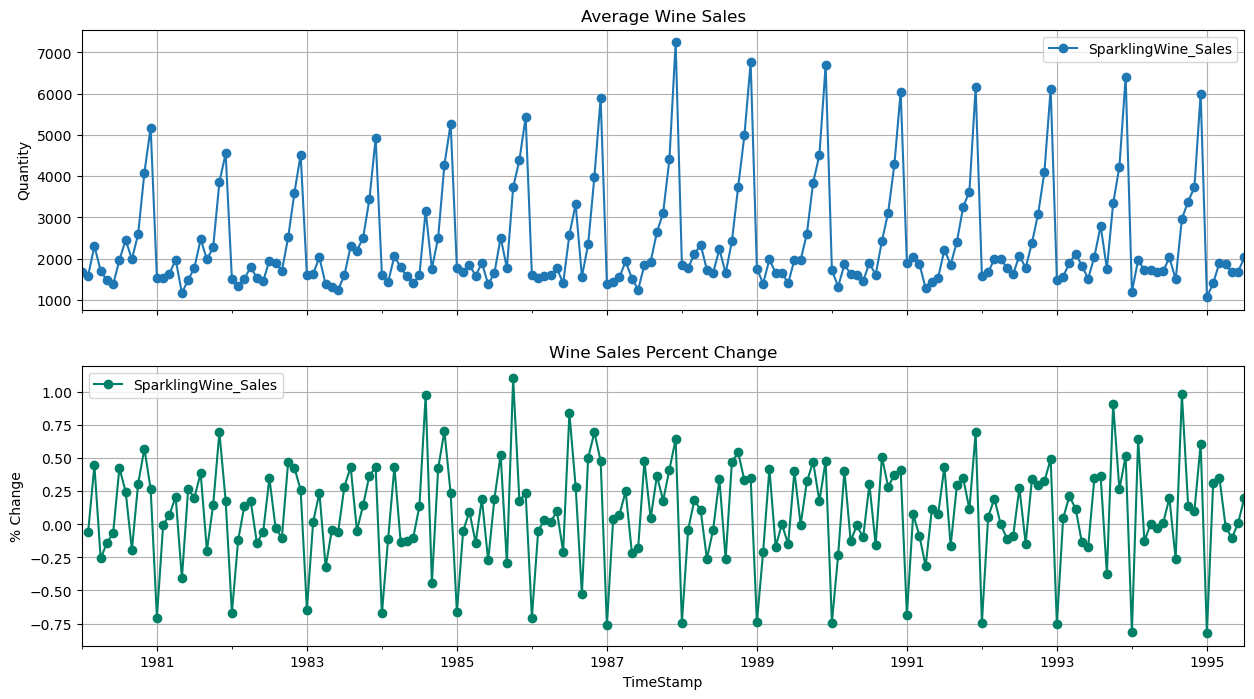

In [40]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["SparklingWine_Sales"].mean()
pct_change = df.groupby(df.index)["SparklingWine_Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Wine Sales",grid=True, ylabel = 'Quantity')
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Wine Sales Percent Change",grid=True, ylabel = '% Change')

### Decomposition of time series - Additive

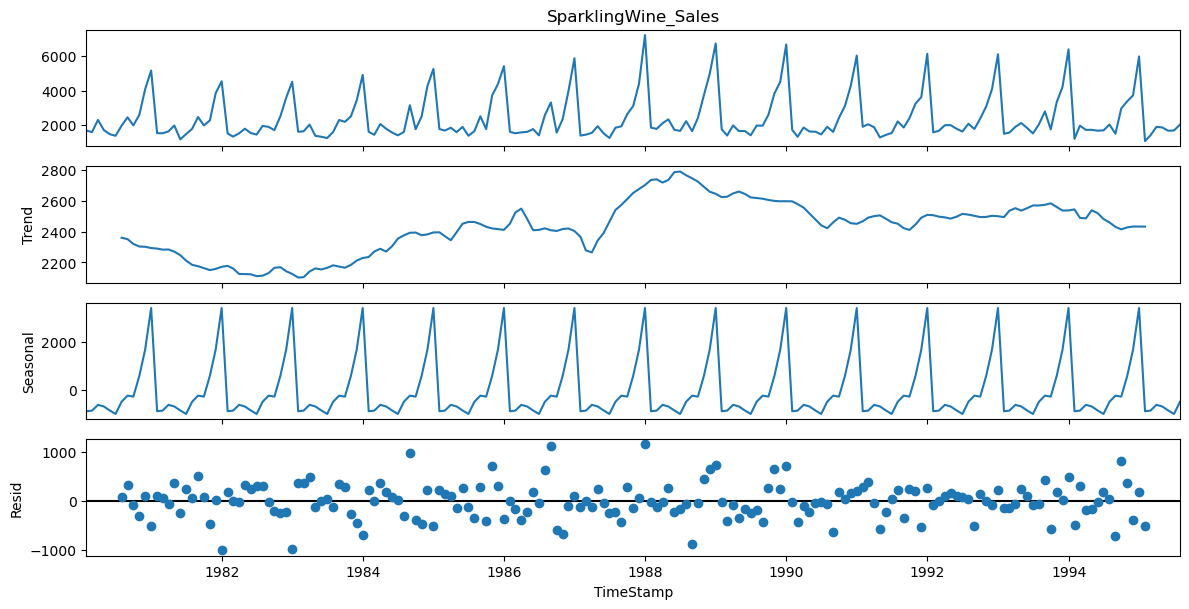

In [42]:
decomposition_add = seasonal_decompose(df['SparklingWine_Sales'],model='additive')
decomposition_add.plot();
plt.xlabel('TimeStamp')
plt.show();

In [43]:
trend_add = decomposition_add.trend
seasonality_add = decomposition_add.seasonal
residual_add = decomposition_add.resid

print('Trend','\n',trend_add.head(12),'\n')
print('Seasonality','\n',seasonality_add.head(12),'\n')
print('Residual','\n',residual_add.head(12),'\n')

Trend 
 TimeStamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 TimeStamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 TimeStamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.353290


### Decomposition of time series - Multiplicative

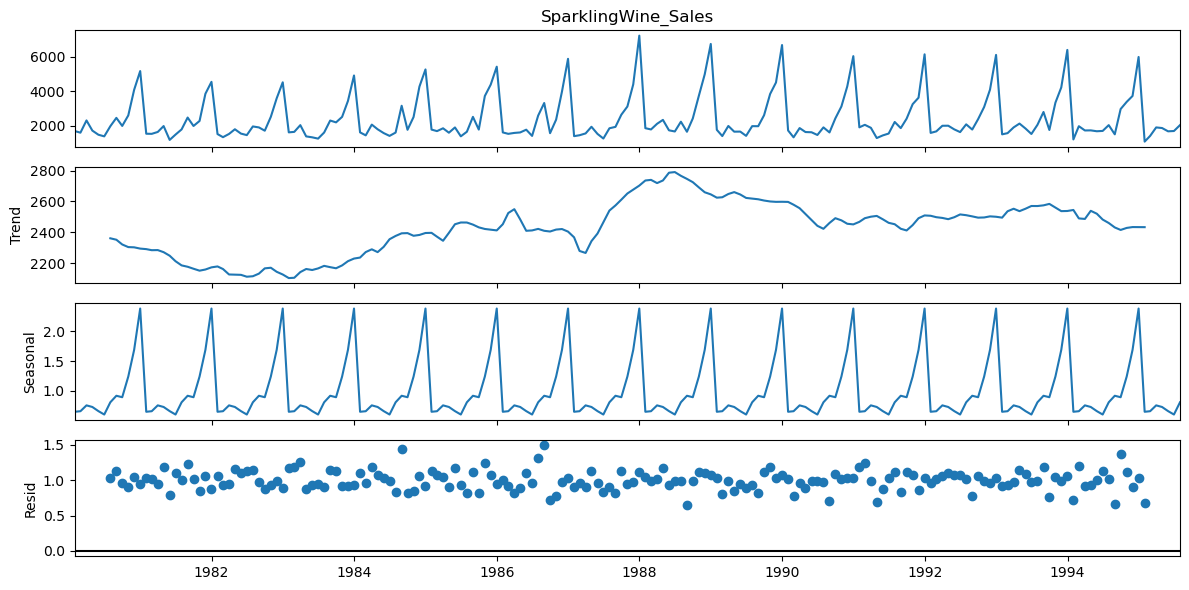

In [45]:
decomposition_mul = seasonal_decompose(df['SparklingWine_Sales'],model='multiplicative')
decomposition_mul.plot();
plt.show();

In [46]:
trend_mul = decomposition_mul.trend
seasonality_mul = decomposition_mul.seasonal
residual_mul = decomposition_mul.resid

print('Trend','\n',trend_mul.head(12),'\n')
print('Seasonality','\n',seasonality_mul.head(12),'\n')
print('Residual','\n',residual_mul.head(12),'\n')

Trend 
 TimeStamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 TimeStamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 TimeStamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: resi

# Data Pre-processing

### Split the data into train and test and plot the training and test data.

In [49]:
train = df[df.index.year < 1991]
test = df[df.index.year >= 1991]

In [50]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


SparklingWine_Sales
TimeStamp                      
1980-01-31                 1686
1980-02-29                 1591
1980-03-31                 2304
1980-04-30                 1712
1980-05-31                 1471

Last few rows of Training Data


SparklingWine_Sales
TimeStamp                      
1990-08-31                 1605
1990-09-30                 2424
1990-10-31                 3116
1990-11-30                 4286
1990-12-31                 6047

First few rows of Test Data


SparklingWine_Sales
TimeStamp                      
1991-01-31                 1902
1991-02-28                 2049
1991-03-31                 1874
1991-04-30                 1279
1991-05-31                 1432

Last few rows of Test Data


SparklingWine_Sales
TimeStamp                      
1995-03-31                 1897
1995-04-30                 1862
1995-05-31                 1670
1995-06-30                 1688
1995-07-31                 2031

In [51]:
#Complete the code to check the shape of train and test sets
print('Shape of Train data: ',train.shape)
print('Shape of Test data: ',test.shape)
print('Total Observations in dataset: ',test.shape[0]+train.shape[0])

Shape of Train data:  (132, 1)
Shape of Test data:  (55, 1)
Total Observations in dataset:  187


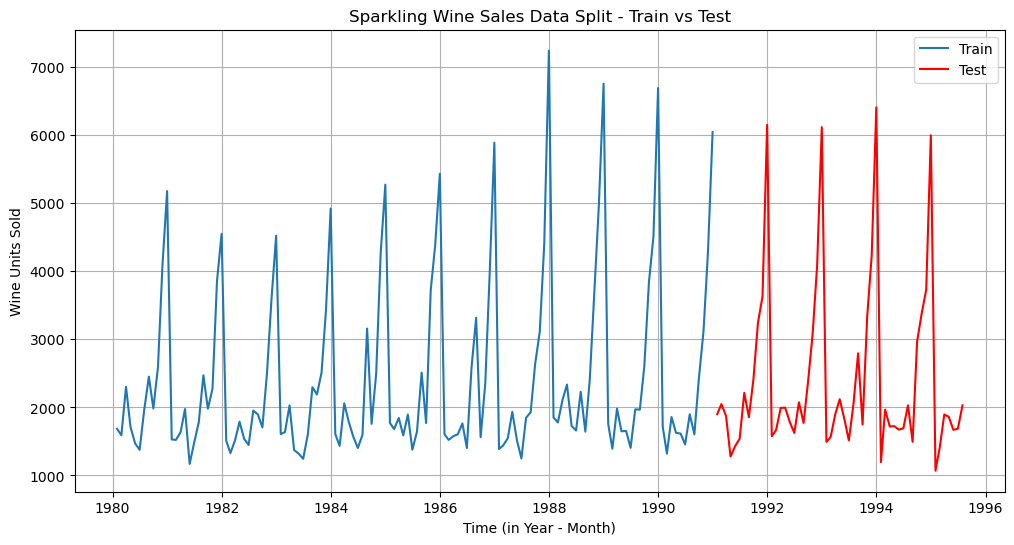

In [52]:
plt.plot(train['SparklingWine_Sales'], label = 'Train')
plt.plot(test['SparklingWine_Sales'], label = 'Test', color='Red')
plt.legend(loc='best')
plt.xlabel('Time (in Year - Month)')
plt.ylabel('Wine Units Sold')
plt.title('Sparkling Wine Sales Data Split - Train vs Test', fontsize = 12)
plt.show;
plt.grid();

# Model Building - Original Data

### 1a. Linear Regression - Model Building

In [55]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train) for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]


In [56]:
lr_train = train.copy()
lr_test = test.copy()

In [57]:
lr_train['Time'] = train_time
lr_test['Time'] = test_time

print('First few rows of Training Data','\n',lr_train.head(),'\n')
print('Last few rows of Training Data','\n',lr_train.tail(),'\n')
print('First few rows of Test Data','\n',lr_test.head(),'\n')
print('Last few rows of Test Data','\n',lr_test.tail(),'\n')

First few rows of Training Data 
             SparklingWine_Sales  Time
TimeStamp                            
1980-01-31                 1686     1
1980-02-29                 1591     2
1980-03-31                 2304     3
1980-04-30                 1712     4
1980-05-31                 1471     5 

Last few rows of Training Data 
             SparklingWine_Sales  Time
TimeStamp                            
1990-08-31                 1605   128
1990-09-30                 2424   129
1990-10-31                 3116   130
1990-11-30                 4286   131
1990-12-31                 6047   132 

First few rows of Test Data 
             SparklingWine_Sales  Time
TimeStamp                            
1991-01-31                 1902   132
1991-02-28                 2049   133
1991-03-31                 1874   134
1991-04-30                 1279   135
1991-05-31                 1432   136 

Last few rows of Test Data 
             SparklingWine_Sales  Time
TimeStamp                       

In [58]:
lr = LinearRegression()

In [59]:
lr.fit(lr_train[['Time']],lr_train['SparklingWine_Sales'].values)

LinearRegression()

In [60]:
pred_train_lr = lr.predict(lr_train[['Time']])
lr_train['RegressionOnTime_pred'] = pred_train_lr

pred_test_lr = lr.predict(lr_test[['Time']])
lr_test['RegressionOnTime_pred'] = pred_test_lr
lr_test.head()

SparklingWine_Sales  Time  RegressionOnTime_pred
TimeStamp                                                   
1991-01-31                 1902   132            2785.819435
1991-02-28                 2049   133            2791.652093
1991-03-31                 1874   134            2797.484752
1991-04-30                 1279   135            2803.317410
1991-05-31                 1432   136            2809.150069

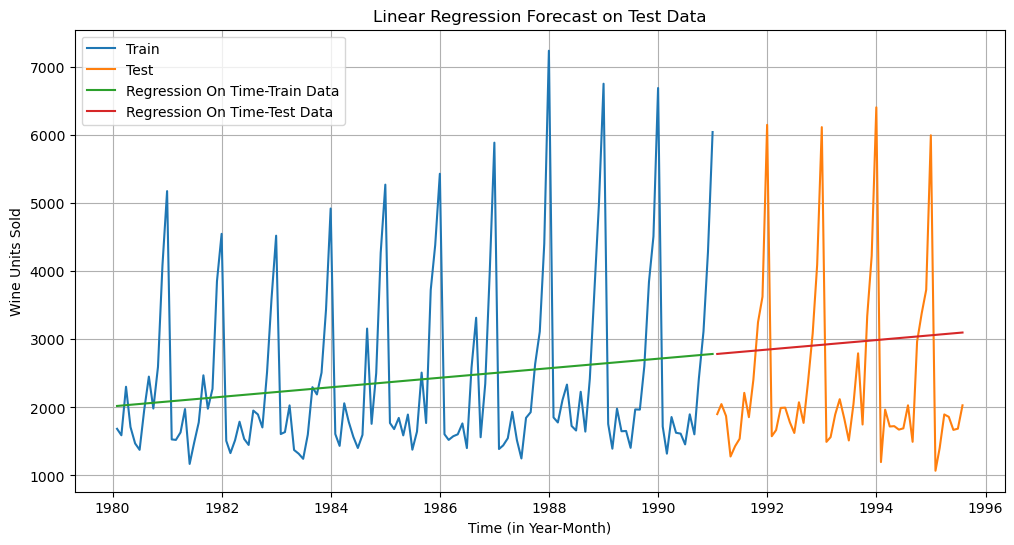

In [61]:
plt.title('Linear Regression Forecast on Test Data')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.plot(train['SparklingWine_Sales'], label='Train')
plt.plot(test['SparklingWine_Sales'], label='Test')
plt.plot(lr_train['RegressionOnTime_pred'], label='Regression On Time-Train Data')
plt.plot(lr_test['RegressionOnTime_pred'], label='Regression On Time-Test Data')
plt.legend(loc='best')
plt.grid();

### 1b. Linear Regression - Model Evaluation

In [63]:
rmse_lr = metrics.root_mean_squared_error(test['SparklingWine_Sales'],lr_test['RegressionOnTime_pred'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_lr))

For RegressionOnTime forecast on the Test Data,  RMSE is 1386.836


In [64]:
df_rmse = pd.DataFrame({'Test RMSE': [rmse_lr]},index=['Linear Regression'])
df_rmse

Test RMSE
Linear Regression  1386.836243

### 2a. Naive Forecast - Model Building

In [66]:
nf_train = train.copy()
nf_test = test.copy()

In [67]:
#Taking the last value in the train data
nf_test['NaiveModel_pred'] = np.asarray(train['SparklingWine_Sales'])[len(np.asarray(train['SparklingWine_Sales']))-1]
nf_test.head()

SparklingWine_Sales  NaiveModel_pred
TimeStamp                                       
1991-01-31                 1902             6047
1991-02-28                 2049             6047
1991-03-31                 1874             6047
1991-04-30                 1279             6047
1991-05-31                 1432             6047

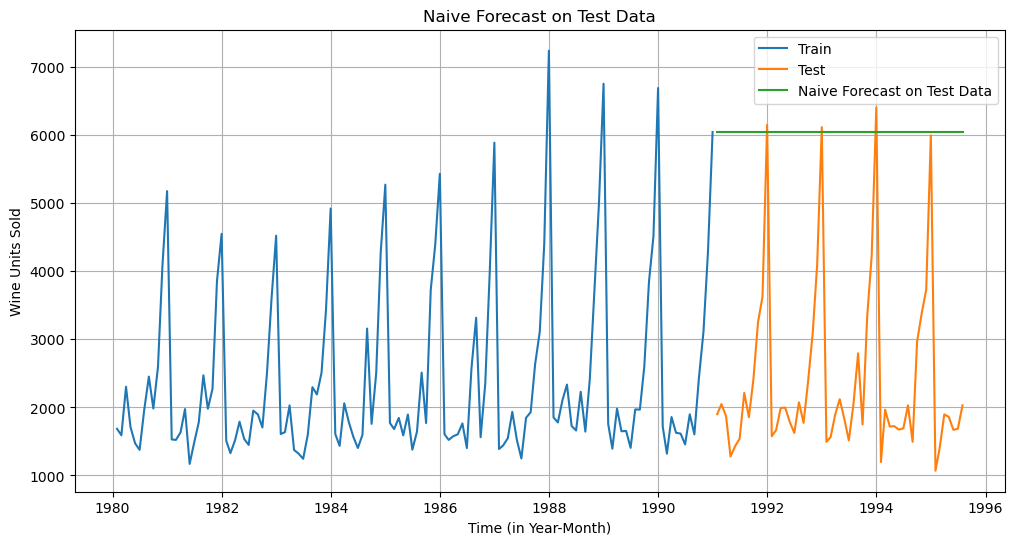

In [68]:
plt.title('Naive Forecast on Test Data')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.plot(nf_train['SparklingWine_Sales'], label='Train')
plt.plot(nf_test['SparklingWine_Sales'], label='Test')
plt.plot(nf_test['NaiveModel_pred'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.grid();

### 2b. Naive Forecast - Model Evaluation

In [70]:
rmse_nf = metrics.root_mean_squared_error(test['SparklingWine_Sales'],nf_test['NaiveModel_pred'])
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_nf))

For Naive forecast on the Test Data,  RMSE is 3864.279


In [71]:
df_rmse_nf = pd.DataFrame({'Test RMSE': [rmse_nf]},index=['Naive Model'])

df_rmse = pd.concat([df_rmse, df_rmse_nf])
df_rmse

Test RMSE
Linear Regression  1386.836243
Naive Model        3864.279352

### 3a. Simple Average - Model Building

In [73]:
sa_train = train.copy()
sa_test = test.copy()

In [74]:
sa_test['SimpleAverage_pred'] = train['SparklingWine_Sales'].mean()
sa_test.head()

SparklingWine_Sales  SimpleAverage_pred
TimeStamp                                          
1991-01-31                 1902         2403.780303
1991-02-28                 2049         2403.780303
1991-03-31                 1874         2403.780303
1991-04-30                 1279         2403.780303
1991-05-31                 1432         2403.780303

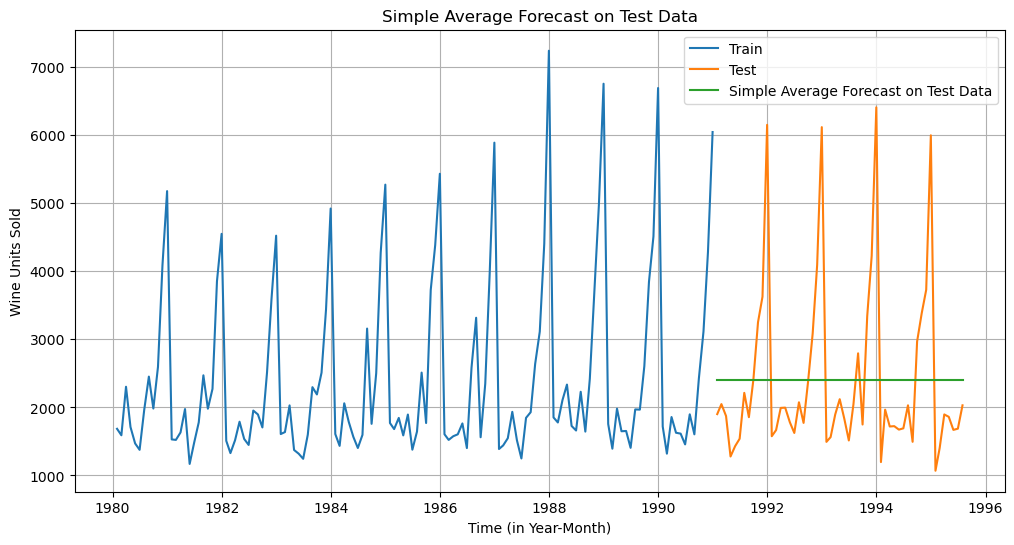

In [75]:
plt.title('Simple Average Forecast on Test Data')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.plot(sa_train['SparklingWine_Sales'], label='Train')
plt.plot(sa_test['SparklingWine_Sales'], label='Test')
plt.plot(sa_test['SimpleAverage_pred'], label='Simple Average Forecast on Test Data')
plt.legend(loc='best')
plt.grid();

### 3b. Simple Average - Model Evaluation

In [77]:
rmse_sa = metrics.root_mean_squared_error(test['SparklingWine_Sales'],sa_test['SimpleAverage_pred'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_sa))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [78]:
df_rmse_sa = pd.DataFrame({'Test RMSE': [rmse_sa]},index=['Simple Average'])

df_rmse = pd.concat([df_rmse, df_rmse_sa])
df_rmse

Test RMSE
Linear Regression  1386.836243
Naive Model        3864.279352
Simple Average     1275.081804

### 4a. Moving Average - Model Building

In [80]:
ma_df = df.copy()
ma_df.head()

SparklingWine_Sales
TimeStamp                      
1980-01-31                 1686
1980-02-29                 1591
1980-03-31                 2304
1980-04-30                 1712
1980-05-31                 1471

In [81]:
ma_df['Trailing_2'] = ma_df['SparklingWine_Sales'].rolling(2).mean()
ma_df['Trailing_4'] = ma_df['SparklingWine_Sales'].rolling(4).mean()
ma_df['Trailing_6'] = ma_df['SparklingWine_Sales'].rolling(6).mean()
ma_df['Trailing_9'] = ma_df['SparklingWine_Sales'].rolling(9).mean()

ma_df.head(9)

SparklingWine_Sales  Trailing_2  Trailing_4   Trailing_6  \
TimeStamp                                                              
1980-01-31                 1686         NaN         NaN          NaN   
1980-02-29                 1591      1638.5         NaN          NaN   
1980-03-31                 2304      1947.5         NaN          NaN   
1980-04-30                 1712      2008.0     1823.25          NaN   
1980-05-31                 1471      1591.5     1769.50          NaN   
1980-06-30                 1377      1424.0     1716.00  1690.166667   
1980-07-31                 1966      1671.5     1631.50  1736.833333   
1980-08-31                 2453      2209.5     1816.75  1880.500000   
1980-09-30                 1984      2218.5     1945.00  1827.166667   

             Trailing_9  
TimeStamp                
1980-01-31          NaN  
1980-02-29          NaN  
1980-03-31          NaN  
1980-04-30          NaN  
1980-05-31          NaN  
1980-06-30          NaN  
1980-07-31          NaN  
1980-08-31          NaN  
1980-09-30  1838.222222

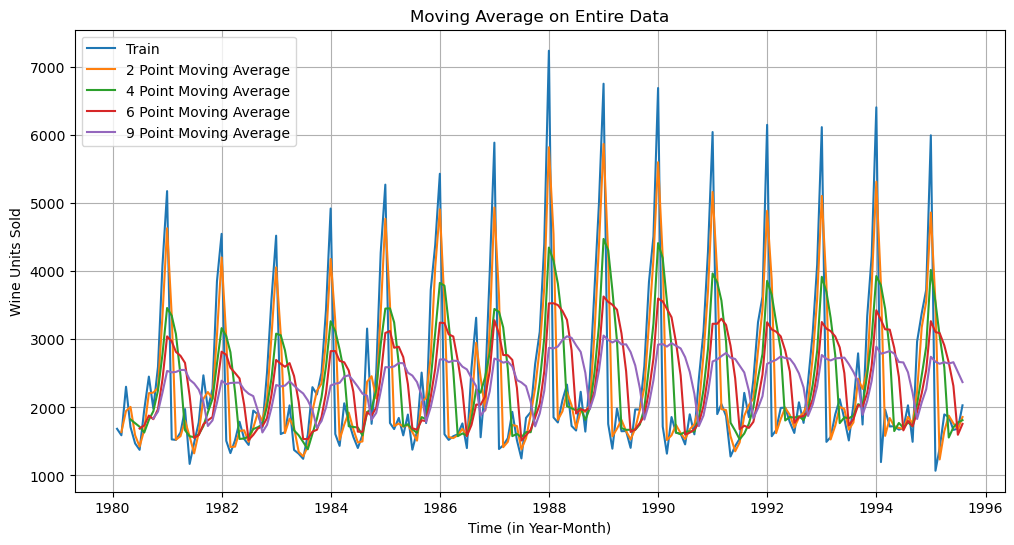

In [82]:
#Plotting on the whole data

plt.plot(ma_df['SparklingWine_Sales'], label='Train')
plt.plot(ma_df['Trailing_2'], label='2 Point Moving Average')
plt.plot(ma_df['Trailing_4'], label='4 Point Moving Average')
plt.plot(ma_df['Trailing_6'],label = '6 Point Moving Average')
plt.plot(ma_df['Trailing_9'],label = '9 Point Moving Average')
plt.title('Moving Average on Entire Data')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.legend(loc = 'best')
plt.grid();

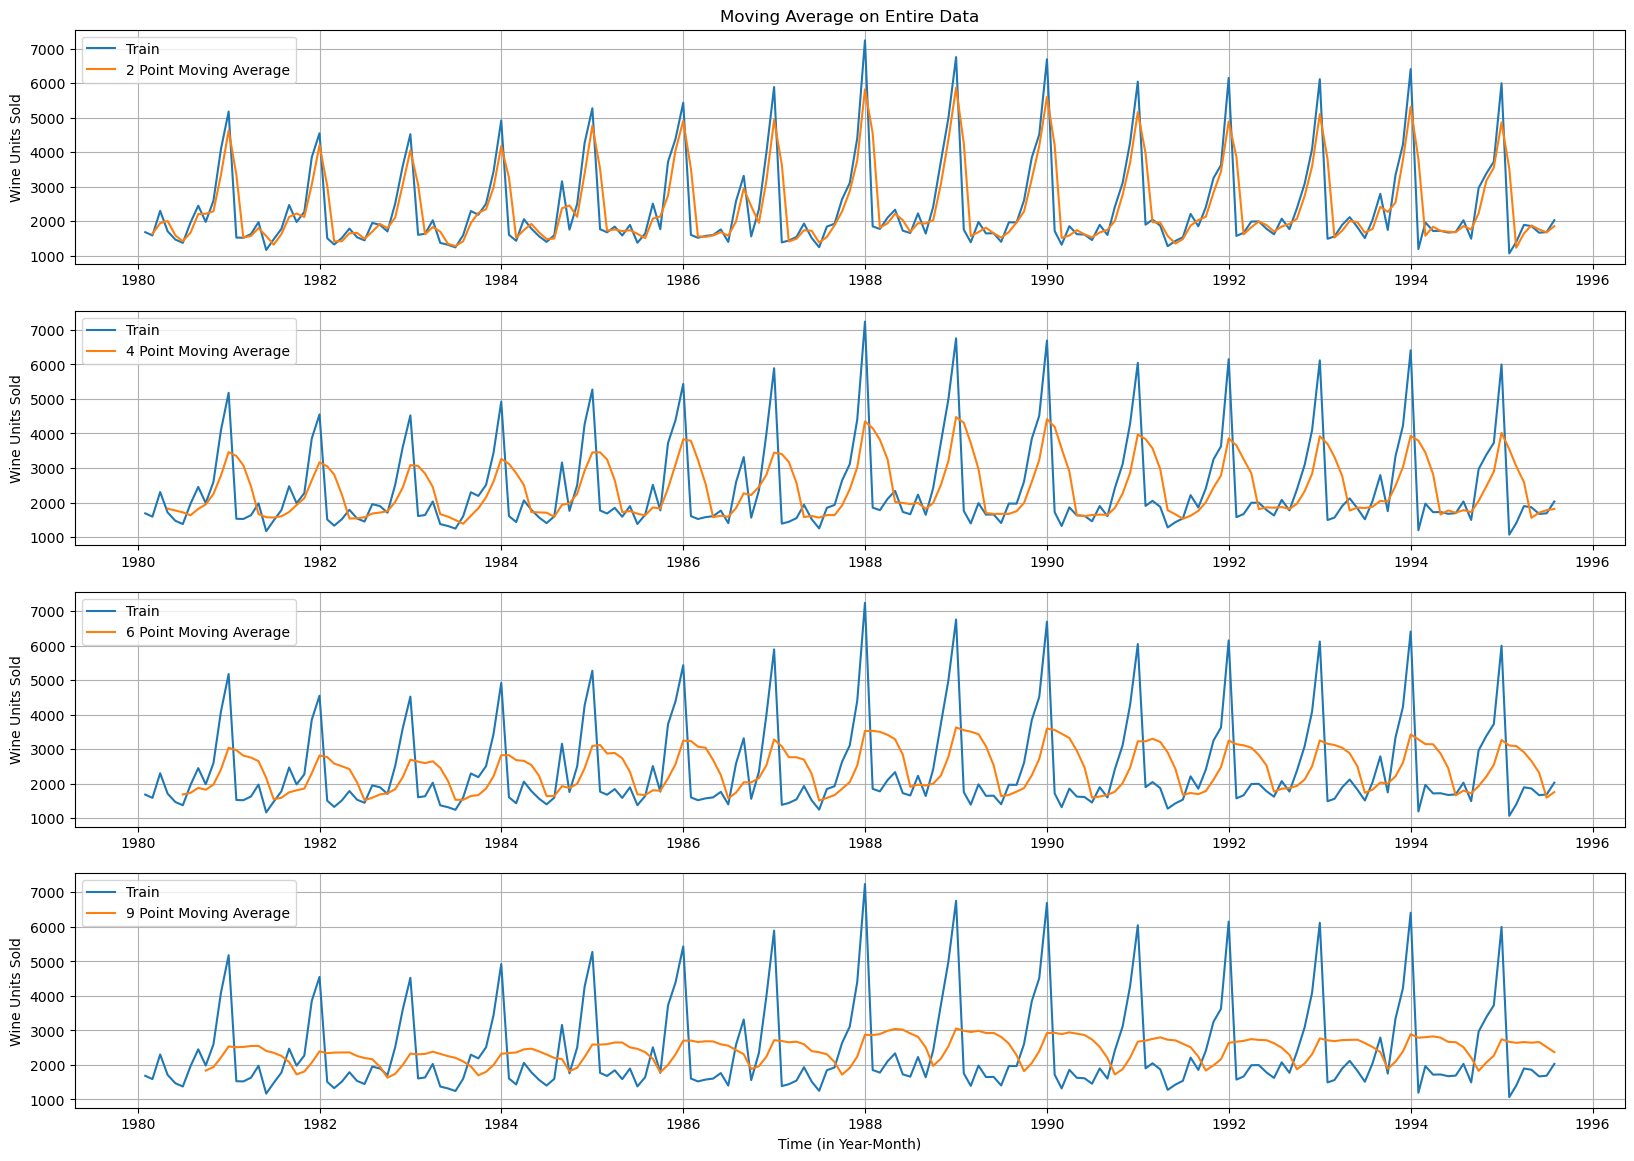

In [83]:
#Plotting on the whole data separately
plt.figure(figsize=(20,14))

plt.subplot(4,1,1)
plt.plot(ma_df['SparklingWine_Sales'], label='Train')
plt.plot(ma_df['Trailing_2'], label='2 Point Moving Average')
plt.title('Moving Average on Entire Data')
plt.ylabel('Wine Units Sold')
plt.legend(loc = 'best')
plt.grid();

plt.subplot(4,1,2)
plt.plot(ma_df['SparklingWine_Sales'], label='Train')
plt.plot(ma_df['Trailing_4'], label='4 Point Moving Average')
plt.ylabel('Wine Units Sold')
plt.legend(loc = 'best')
plt.grid();

plt.subplot(4,1,3)
plt.plot(ma_df['SparklingWine_Sales'], label='Train')
plt.plot(ma_df['Trailing_6'],label = '6 Point Moving Average')
plt.ylabel('Wine Units Sold')
plt.legend(loc = 'best')
plt.grid();

plt.subplot(4,1,4)
plt.plot(ma_df['SparklingWine_Sales'], label='Train')
plt.plot(ma_df['Trailing_9'],label = '9 Point Moving Average')
plt.ylabel('Wine Units Sold')
plt.xlabel('Time (in Year-Month)')
plt.legend(loc = 'best')

plt.grid();

In [84]:
#Creating train and test set 
tma_train = ma_df[ma_df.index.year < 1991]
tma_test = ma_df[ma_df.index.year >= 1991]

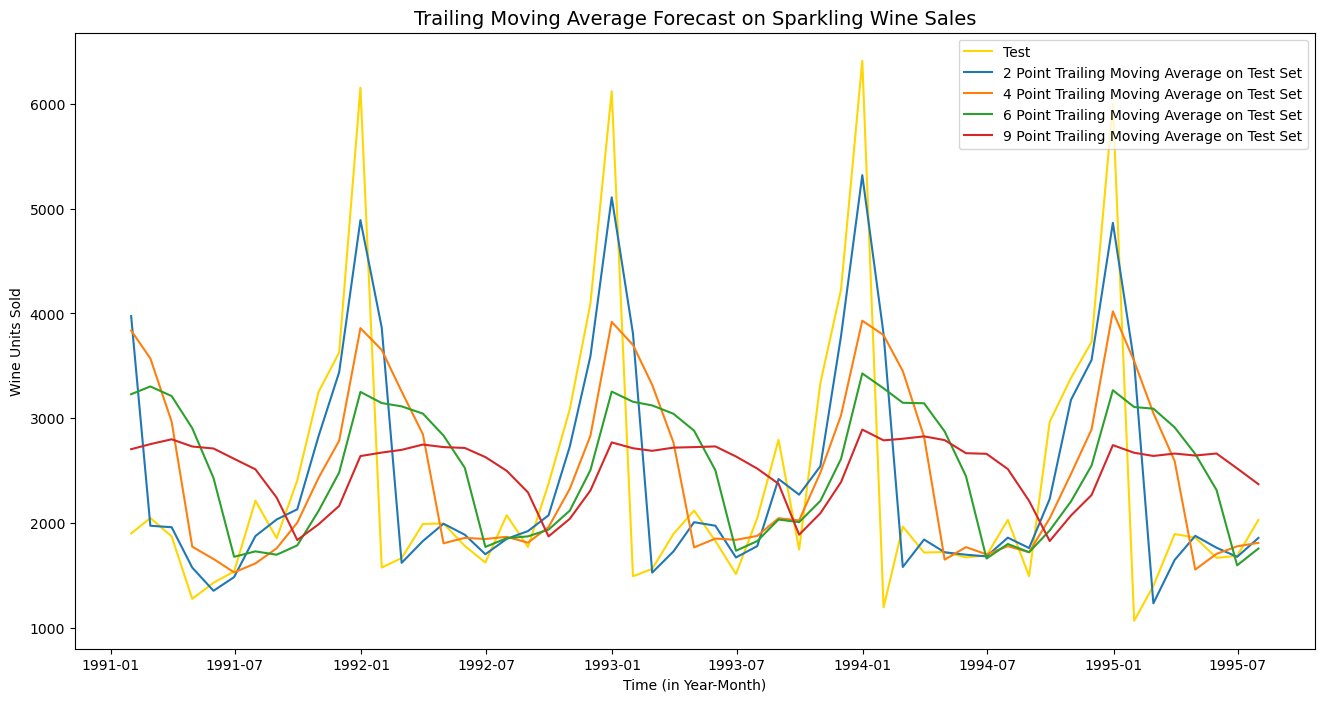

In [85]:
plt.figure(figsize=(16,8))
#plt.plot(tma_train['SparklingWine_Sales'], label='Train', color = 'violet')
plt.plot(tma_test['SparklingWine_Sales'], label='Test', color = 'gold')

plt.plot(tma_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(tma_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(tma_test['Trailing_6'], label='6 Point Trailing Moving Average on Test Set')
plt.plot(tma_test['Trailing_9'], label='9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.title("Trailing Moving Average Forecast on Sparkling Wine Sales", fontsize=14)
plt.show();

### 4b. Moving Average - Model Evaluation

In [87]:
# Test Data - RMSE --> 2 point Trailing MA
rmse_TMA2 = metrics.root_mean_squared_error(test['SparklingWine_Sales'],tma_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_TMA2))

# Test Data - RMSE --> 4 point Trailing MA
rmse_TMA4 = metrics.root_mean_squared_error(test['SparklingWine_Sales'],tma_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_TMA4))

# Test Data - RMSE --> 6 point Trailing MA
rmse_TMA6 = metrics.root_mean_squared_error(test['SparklingWine_Sales'],tma_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_TMA6))

# Test Data - RMSE --> 9 point Trailing MA
rmse_TMA9 = metrics.root_mean_squared_error(test['SparklingWine_Sales'],tma_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_TMA9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278


In [88]:
df_rmse_ma = pd.DataFrame({'Test RMSE': [rmse_TMA2,rmse_TMA4,rmse_TMA6,rmse_TMA9]},index=['Moving Average - 2 point Trailing','Moving Average - 4 point Trailing','Moving Average - 6 point Trailing','Moving Average - 9 point Trailing'])

df_rmse = pd.concat([df_rmse, df_rmse_ma])
df_rmse

# 2 Point Trailing MA seems to be the best out of all since it has the least RMSE

Test RMSE
Linear Regression                  1386.836243
Naive Model                        3864.279352
Simple Average                     1275.081804
Moving Average - 2 point Trailing   813.400684
Moving Average - 4 point Trailing  1156.589694
Moving Average - 6 point Trailing  1283.927428
Moving Average - 9 point Trailing  1346.278315

#### Model Comparison Plots - Regression, Naive, SA, MA(2)

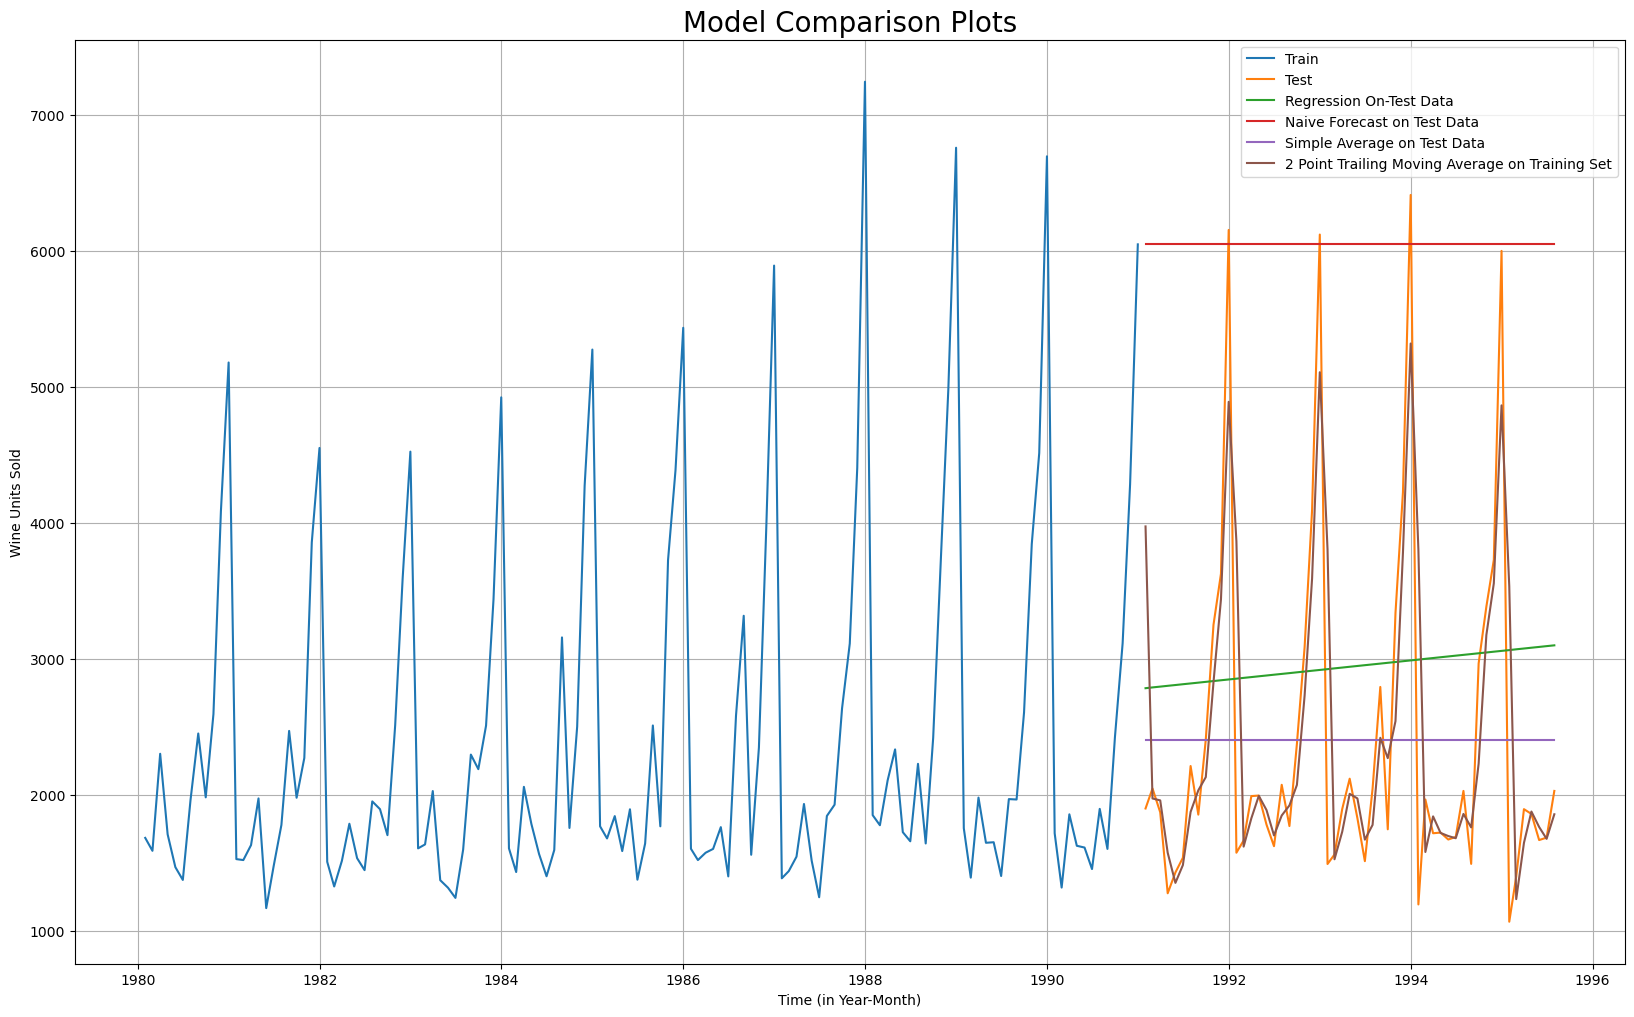

In [90]:
## Plotting on both Training and Test data

plt.figure(figsize=(20,12))

plt.plot(train['SparklingWine_Sales'], label='Train')
plt.plot(test['SparklingWine_Sales'], label='Test')

plt.plot(lr_test['RegressionOnTime_pred'], label='Regression On-Test Data')

plt.plot(nf_test['NaiveModel_pred'], label='Naive Forecast on Test Data')

plt.plot(sa_test['SimpleAverage_pred'], label='Simple Average on Test Data')

plt.plot(tma_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots",fontsize=20)
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();

### 5a. Simple Exponential Smoothing (Autofit) - Model Building

In [92]:
ses_train = train.copy()
ses_test = test.copy()

In [93]:
ses = SimpleExpSmoothing(ses_train['SparklingWine_Sales'])

In [94]:
ses_autofit = ses.fit(optimized=True)
ses_autofit.params

{'smoothing_level': 0.03953488372093023,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [95]:
ses_test['SES_pred'] = ses_autofit.forecast(steps=len(test))
ses_test.head()

SparklingWine_Sales     SES_pred
TimeStamp                                   
1991-01-31                 1902  2676.676366
1991-02-28                 2049  2676.676366
1991-03-31                 1874  2676.676366
1991-04-30                 1279  2676.676366
1991-05-31                 1432  2676.676366

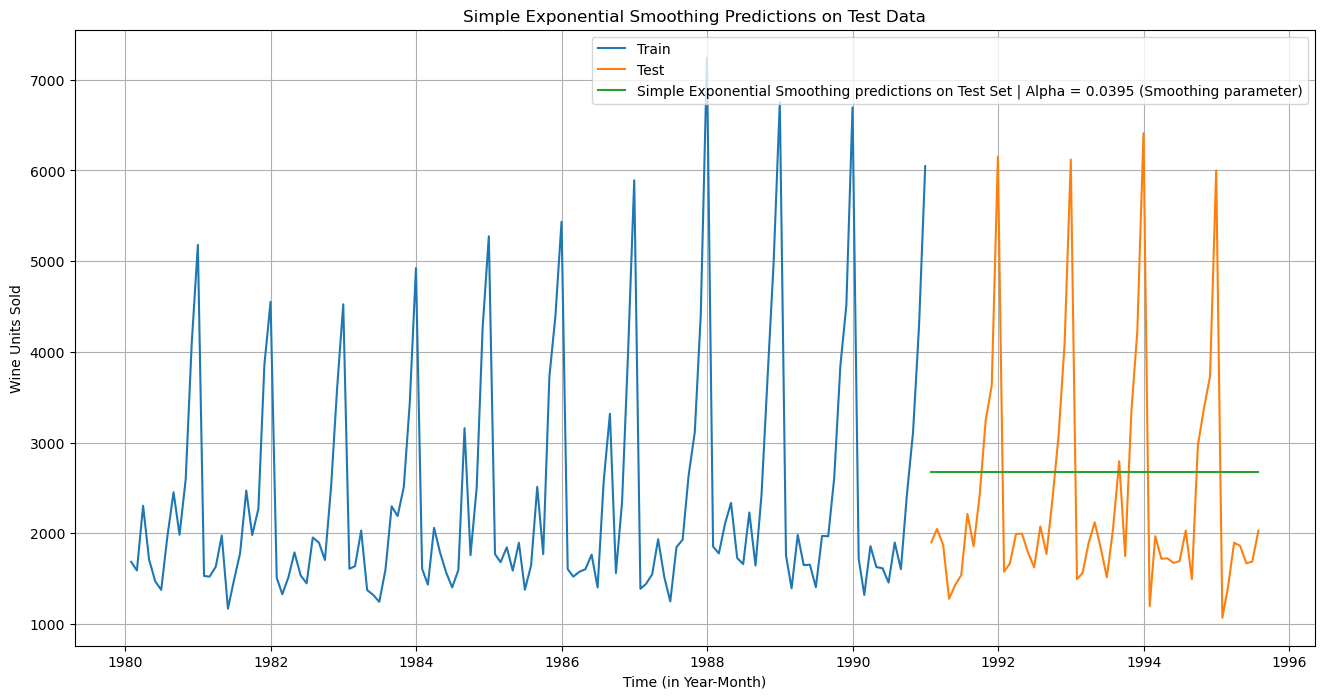

In [96]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(ses_train['SparklingWine_Sales'], label='Train')
plt.plot(ses_test['SparklingWine_Sales'], label='Test')
plt.plot(ses_test['SES_pred'], label='Simple Exponential Smoothing predictions on Test Set | Alpha = 0.0395 (Smoothing parameter)')
plt.legend(loc='best')
plt.grid()
plt.title('Simple Exponential Smoothing Predictions on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.show();

### 5b. Simple Exponential Smoothing - Model Evaluation

In [98]:
rmse_ses = metrics.root_mean_squared_error(test['SparklingWine_Sales'],ses_test['SES_pred'])
print("For Simple Exponential Smoothing Model forecast (Alpha = 0.0395) on the Test Data,  RMSE is %3.3f" %(rmse_ses))

For Simple Exponential Smoothing Model forecast (Alpha = 0.0395) on the Test Data,  RMSE is 1304.927


In [99]:
df_rmse_ses = pd.DataFrame({'Test RMSE': [rmse_ses]},index=['Simple Exponential Smoothing (autofit) | Alpha = 0.0395'])

df_rmse = pd.concat([df_rmse, df_rmse_ses])
df_rmse

Test RMSE
Linear Regression                                   1386.836243
Naive Model                                         3864.279352
Simple Average                                      1275.081804
Moving Average - 2 point Trailing                    813.400684
Moving Average - 4 point Trailing                   1156.589694
Moving Average - 6 point Trailing                   1283.927428
Moving Average - 9 point Trailing                   1346.278315
Simple Exponential Smoothing (autofit) | Alpha ...  1304.927405

### 6a. Simple Exponential Smoothing (Manual) - Model Building

In [101]:
df_rmse_ses_manual = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
df_rmse_ses_manual

Empty DataFrame
Columns: [Alpha Values, Test RMSE]
Index: []

In [102]:
%%time
for i in np.arange(0.1,1,0.05):
    ses_manual = ses.fit(smoothing_level=i,optimized=False,use_brute=True)
    ses_test['SES_pred',i] = ses_manual.forecast(steps=len(test))
    rmse_ses_manual = metrics.root_mean_squared_error(ses_test['SparklingWine_Sales'], ses_test['SES_pred',i])
    df_ses_manual_temp = pd.DataFrame({'Alpha Values': i,'Test RMSE': rmse_ses_manual},index=[i])
    df_rmse_ses_manual = pd.concat([df_rmse_ses_manual, df_ses_manual_temp])

df_rmse_ses_manual.sort_values(by=['Test RMSE'],ascending=True)
print('Top 5 Alpha Values with least RMSE:-\n')
df_rmse_ses_manual.head()

Top 5 Alpha Values with least RMSE:-

CPU times: total: 328 ms
Wall time: 351 ms


Alpha Values    Test RMSE
0.10          0.10  1375.393398
0.15          0.15  1466.203651
0.20          0.20  1595.206839
0.25          0.25  1755.488175
0.30          0.30  1935.507132

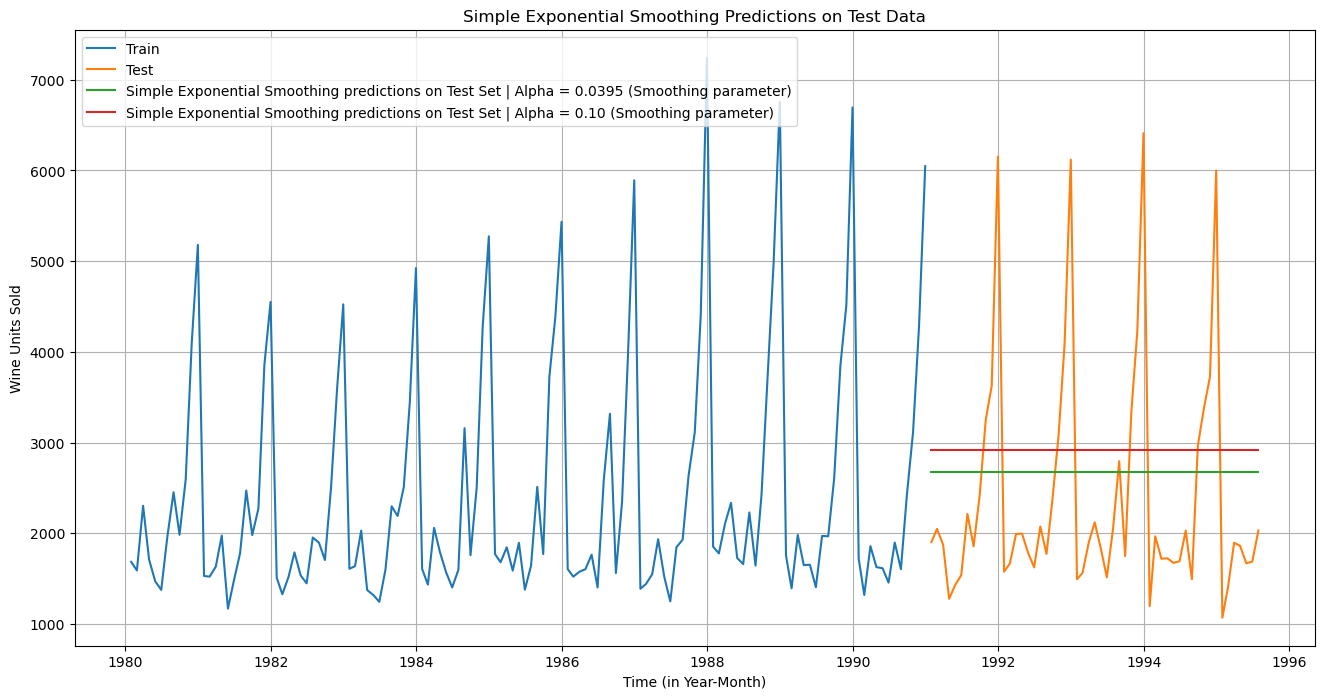

In [103]:
#Plotting on both the Training and Test data

#Fitting the model again with alpha = 0.10 since it has the least RMSE
ses_manual_i = ses.fit(smoothing_level=0.1,optimized=False,use_brute=True)
ses_test['SES_pred',0.1] = ses_manual_i.forecast(steps=len(test))

plt.figure(figsize=(16,8))
plt.plot(ses_train['SparklingWine_Sales'], label='Train')
plt.plot(ses_test['SparklingWine_Sales'], label='Test')
plt.plot(ses_test['SES_pred'], label='Simple Exponential Smoothing predictions on Test Set | Alpha = 0.0395 (Smoothing parameter)')
plt.plot(ses_test['SES_pred',0.1], label='Simple Exponential Smoothing predictions on Test Set | Alpha = 0.10 (Smoothing parameter)')
plt.legend(loc='best')
plt.grid()
plt.title('Simple Exponential Smoothing Predictions on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.show();

### 6b. Simple Exponential Smoothing (Manual) - Model Evaluation

In [105]:
rmse_ses_manual = metrics.root_mean_squared_error(test['SparklingWine_Sales'],ses_test['SES_pred',0.1])
print("For Simple Exponential Smoothing Model forecast (Alpha = 0.10) on the Test Data,  RMSE is %3.3f" %(rmse_ses_manual))

For Simple Exponential Smoothing Model forecast (Alpha = 0.10) on the Test Data,  RMSE is 1375.393


In [106]:
df_rmse_ses_manual = pd.DataFrame({'Test RMSE': [rmse_ses_manual]},index=['Simple Exponential Smoothing (manual) | Alpha = 0.10'])

df_rmse = pd.concat([df_rmse, df_rmse_ses_manual])
df_rmse

Test RMSE
Linear Regression                                   1386.836243
Naive Model                                         3864.279352
Simple Average                                      1275.081804
Moving Average - 2 point Trailing                    813.400684
Moving Average - 4 point Trailing                   1156.589694
Moving Average - 6 point Trailing                   1283.927428
Moving Average - 9 point Trailing                   1346.278315
Simple Exponential Smoothing (autofit) | Alpha ...  1304.927405
Simple Exponential Smoothing (manual) | Alpha =...  1375.393398

### 7a. Double Exponential Smoothing (Autofit) - Model Building

In [108]:
des_train = train.copy()
des_test = test.copy()

In [109]:
# Initializing the Double Exponential Smoothing Model
des = Holt(des_train)
# Fitting the model
des = des.fit()
des.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [110]:
# Forecasting using this model for the test set
des_test['DES_pred'] =  des.forecast(len(test))
des_test.head()

SparklingWine_Sales     DES_pred
TimeStamp                                   
1991-01-31                 1902  5221.278699
1991-02-28                 2049  5127.886554
1991-03-31                 1874  5034.494409
1991-04-30                 1279  4941.102264
1991-05-31                 1432  4847.710119

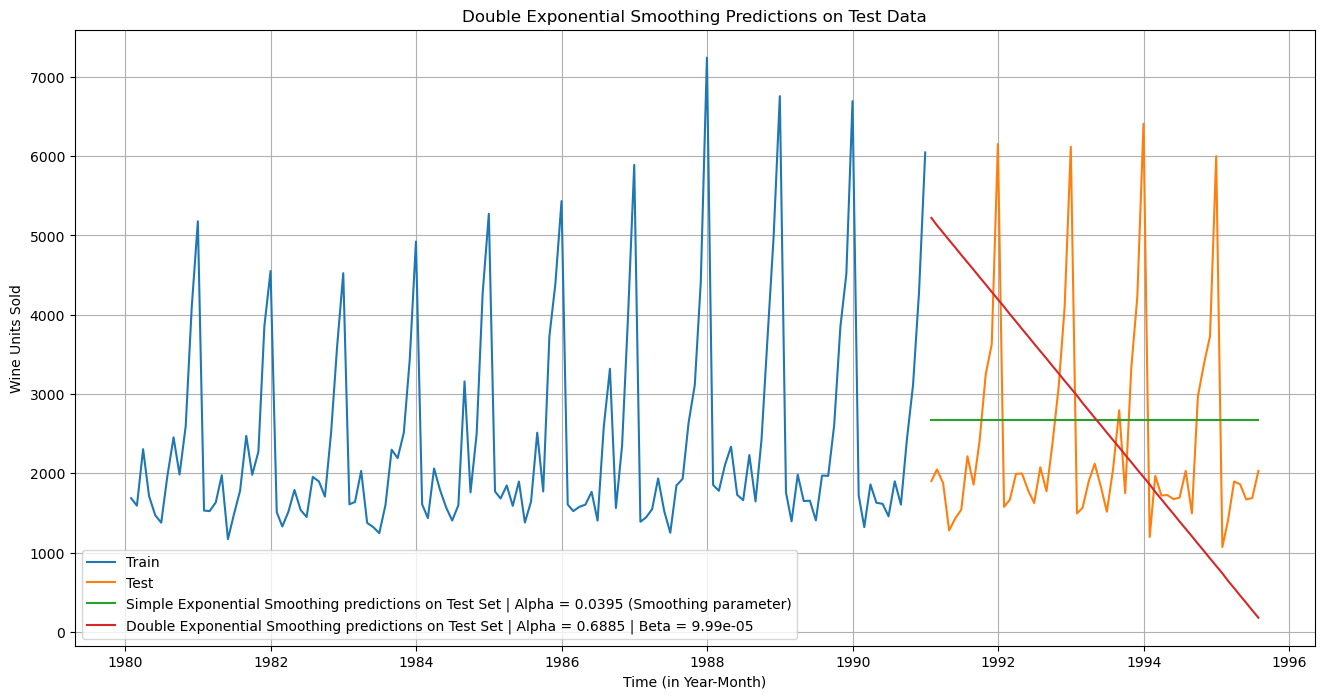

In [111]:
#Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(des_train['SparklingWine_Sales'], label='Train')
plt.plot(des_test['SparklingWine_Sales'], label='Test')
plt.plot(ses_test['SES_pred'], label='Simple Exponential Smoothing predictions on Test Set | Alpha = 0.0395 (Smoothing parameter)')
plt.plot(des_test['DES_pred'], label='Double Exponential Smoothing predictions on Test Set | Alpha = 0.6885 | Beta = 9.99e-05')
plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.show();

### 7b. Double Exponential Smoothing (Autofit) - Model Evaluation

In [113]:
rmse_des = metrics.root_mean_squared_error(test['SparklingWine_Sales'],des_test['DES_pred'])
print("For Double Exponential Smoothing Model forecast (Alpha = 0.6885, Beta = 9.99e-05) on the Test Data,  RMSE is %3.3f" %(rmse_des))

For Double Exponential Smoothing Model forecast (Alpha = 0.6885, Beta = 9.99e-05) on the Test Data,  RMSE is 2007.239


In [114]:
df_rmse_des = pd.DataFrame({'Test RMSE': [rmse_des]},index=['Double Exponential Smoothing (autofit) | Alpha = 0.6885 | Beta = 9.99e-05'])

df_rmse = pd.concat([df_rmse, df_rmse_des])
df_rmse

Test RMSE
Linear Regression                                   1386.836243
Naive Model                                         3864.279352
Simple Average                                      1275.081804
Moving Average - 2 point Trailing                    813.400684
Moving Average - 4 point Trailing                   1156.589694
Moving Average - 6 point Trailing                   1283.927428
Moving Average - 9 point Trailing                   1346.278315
Simple Exponential Smoothing (autofit) | Alpha ...  1304.927405
Simple Exponential Smoothing (manual) | Alpha =...  1375.393398
Double Exponential Smoothing (autofit) | Alpha ...  2007.238526

### 8a. Double Exponential Smoothing (Manual) - Model Building

In [116]:
## First we will define an empty dataframe to store our values from the loop

df_rmse_des_manual = pd.DataFrame({'Alpha':[],'Beta':[],'Test RMSE': []})
df_rmse_des_manual

Empty DataFrame
Columns: [Alpha, Beta, Test RMSE]
Index: []

In [117]:
%%time
model_des = Holt(des_train['SparklingWine_Sales'])
for i in np.arange(0.05,1.05,0.05):
    for j in np.arange(0.05,1.05,0.05):
        des_manual = model_des.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        des_test['DES_pred',i,j] = des_manual.forecast(len(test))
        rmse_des_manual = metrics.root_mean_squared_error(des_test['SparklingWine_Sales'], des_test['DES_pred',i,j])
        df_des_manual_temp = pd.DataFrame({'Alpha': i,'Beta': j,'Test RMSE': rmse_des_manual},index=[j])
        df_rmse_des_manual = pd.concat([df_rmse_des_manual, df_des_manual_temp])

df_rmse_des_manual

CPU times: total: 8.77 s
Wall time: 9.62 s


Alpha  Beta     Test RMSE
0.05   0.05  0.05   1418.407668
0.10   0.05  0.10   1466.899629
0.15   0.05  0.15   1457.041594
0.20   0.05  0.20   1443.099273
0.25   0.05  0.25   1550.422496
...     ...   ...           ...
0.80   1.00  0.80  55442.273880
0.85   1.00  0.85  56677.130498
0.90   1.00  0.90  57823.177011
0.95   1.00  0.95  58888.482146
1.00   1.00  1.00  59877.076519

[400 rows x 3 columns]

In [118]:
print('Top 5 Alpha-Beta Values with least RMSE:-\n')
df_rmse_des_manual.sort_values(by=['Test RMSE']).head()

Top 5 Alpha-Beta Values with least RMSE:-



Alpha  Beta    Test RMSE
0.05   0.05  0.05  1418.407668
0.20   0.05  0.20  1443.099273
0.15   0.05  0.15  1457.041594
0.10   0.05  0.10  1466.899629
0.35   0.05  0.35  1547.022626

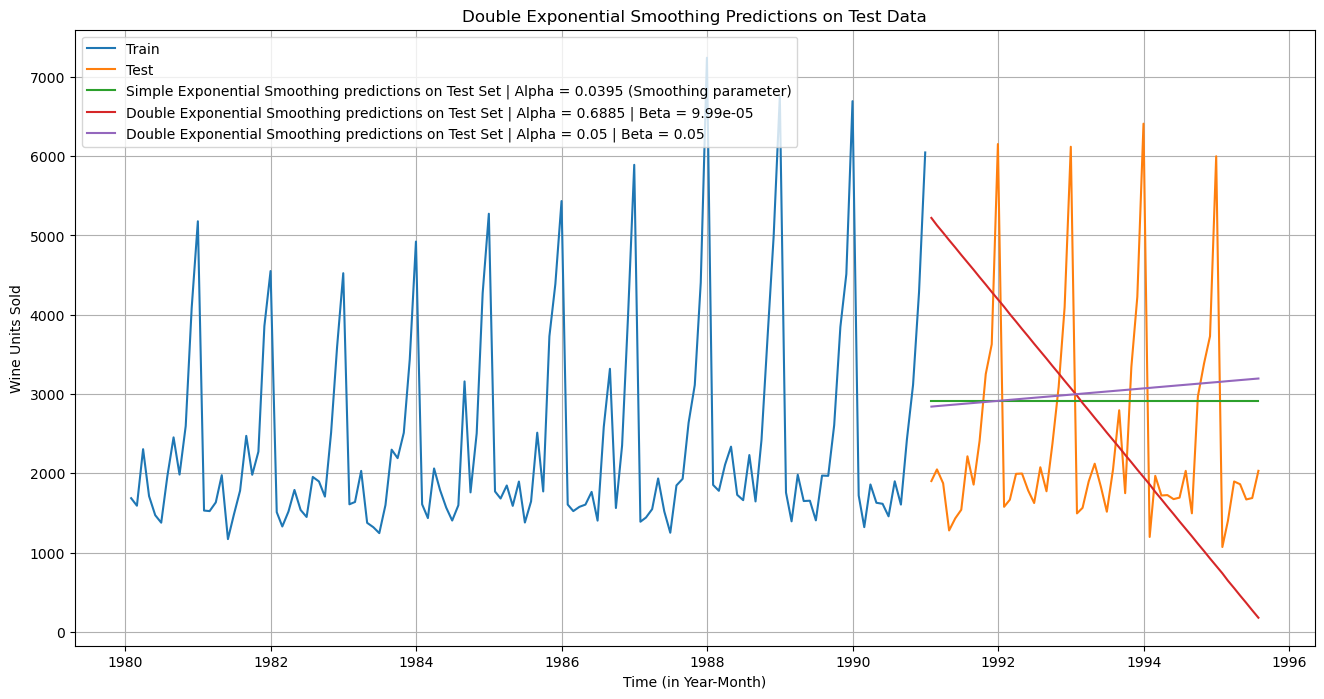

In [119]:
#Plotting on both the Training and Test data

#Fitting the model again with alpha = 0.05 & Beta = 0.05 since it has the least RMSE
des_manual_i_j = model_des.fit(smoothing_level=0.05,smoothing_trend=0.05,optimized=False,use_brute=True)
des_test['DES_pred',0.05,0.05] = des_manual_i_j.forecast(steps=len(test))

plt.figure(figsize=(16,8))
plt.plot(des_train['SparklingWine_Sales'], label='Train')
plt.plot(des_test['SparklingWine_Sales'], label='Test')
plt.plot(ses_test['SES_pred',0.1], label='Simple Exponential Smoothing predictions on Test Set | Alpha = 0.0395 (Smoothing parameter)')
plt.plot(des_test['DES_pred'], label='Double Exponential Smoothing predictions on Test Set | Alpha = 0.6885 | Beta = 9.99e-05')
plt.plot(des_test['DES_pred',0.05,0.05], label='Double Exponential Smoothing predictions on Test Set | Alpha = 0.05 | Beta = 0.05')
plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.show();

### 8b. Double Exponential Smoothing (Manual) - Model Evaluation

In [121]:
rmse_des_manual = metrics.root_mean_squared_error(test['SparklingWine_Sales'],des_test['DES_pred',0.05,0.05])
print("For Double Exponential Smoothing Model forecast (Alpha = 0.05, Beta = 0.05) on the Test Data,  RMSE is %3.3f" %(rmse_des_manual))

For Double Exponential Smoothing Model forecast (Alpha = 0.05, Beta = 0.05) on the Test Data,  RMSE is 1418.408


In [122]:
df_rmse_des_manual = pd.DataFrame({'Test RMSE': [rmse_des_manual]},index=['Double Exponential Smoothing (manual) | Alpha = 0.05 | Beta = 0.05'])

df_rmse = pd.concat([df_rmse, df_rmse_des_manual])
df_rmse

Test RMSE
Linear Regression                                   1386.836243
Naive Model                                         3864.279352
Simple Average                                      1275.081804
Moving Average - 2 point Trailing                    813.400684
Moving Average - 4 point Trailing                   1156.589694
Moving Average - 6 point Trailing                   1283.927428
Moving Average - 9 point Trailing                   1346.278315
Simple Exponential Smoothing (autofit) | Alpha ...  1304.927405
Simple Exponential Smoothing (manual) | Alpha =...  1375.393398
Double Exponential Smoothing (autofit) | Alpha ...  2007.238526
Double Exponential Smoothing (manual) | Alpha =...  1418.407668

### 9a. Triple Exponential Smoothing (Autofit) - Model Building

In [124]:
tes_train = train.copy()
tes_test = test.copy()

In [125]:
tes_aa = ExponentialSmoothing(tes_train['SparklingWine_Sales'],trend='additive',seasonal='additive',initialization_method='estimated',freq='M')
tes_am = ExponentialSmoothing(tes_train['SparklingWine_Sales'],trend='additive',seasonal='multiplicative',initialization_method='estimated',freq='M')
tes_ma = ExponentialSmoothing(tes_train['SparklingWine_Sales'],trend='multiplicative',seasonal='additive',initialization_method='estimated',freq='M')
tes_mm = ExponentialSmoothing(tes_train['SparklingWine_Sales'],trend='multiplicative',seasonal='multiplicative',initialization_method='estimated',freq='M')
tes_nm = ExponentialSmoothing(tes_train['SparklingWine_Sales'],seasonal='multiplicative',initialization_method='estimated',freq='M')
tes_na = ExponentialSmoothing(tes_train['SparklingWine_Sales'],seasonal='additive',initialization_method='estimated',freq='M')
#tes = ExponentialSmoothing(tes_train['SparklingWine_Sales'],trend='additive',seasonal='multiplicative',freq='M')

In [126]:
tes_aa.fit().params

{'smoothing_level': 0.11127227248079453,
 'smoothing_trend': 0.012360804305088534,
 'smoothing_seasonal': 0.46071766688111543,
 'damping_trend': nan,
 'initial_level': 2356.577980956387,
 'initial_trend': -0.10243675533021725,
 'initial_seasons': array([-636.23319334, -722.9832009 , -398.64410813, -473.43045416,
        -808.42473284, -815.34991402, -384.23065038,   72.99484403,
        -237.44226045,  272.32608272, 1541.37737052, 2590.07692296]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [127]:
tes_am.fit().params

{'smoothing_level': 0.11133818361298699,
 'smoothing_trend': 0.049505131019509915,
 'smoothing_seasonal': 0.3620795793580111,
 'damping_trend': nan,
 'initial_level': 2356.4967888704355,
 'initial_trend': -10.187944726007238,
 'initial_seasons': array([0.71296382, 0.68242226, 0.90755008, 0.80515228, 0.65597218,
        0.65414505, 0.88617935, 1.13345121, 0.92046306, 1.21337874,
        1.87340336, 2.37811768]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [128]:
tes_ma.fit().params

{'smoothing_level': 0.11547695423872925,
 'smoothing_trend': 0.01333948465001367,
 'smoothing_seasonal': 0.45651344911741876,
 'damping_trend': nan,
 'initial_level': 2356.7858848588307,
 'initial_trend': 0.9993277724877484,
 'initial_seasons': array([-689.98020882, -763.37387324, -296.37077918, -501.80365863,
        -860.47791971, -865.97665429, -384.33505634,  141.07945892,
        -307.05100916,  257.89484861, 1675.59313811, 2693.73018421]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [129]:
tes_mm.fit().params

{'smoothing_level': 0.11106668752955826,
 'smoothing_trend': 0.04936072355729082,
 'smoothing_seasonal': 0.3621821387810734,
 'damping_trend': nan,
 'initial_level': 2360.4089797373545,
 'initial_trend': 0.9992288111047797,
 'initial_seasons': array([0.71936124, 0.6984697 , 0.90024844, 0.80991063, 0.66820986,
        0.66898271, 0.87875613, 1.11648842, 0.90067181, 1.17297733,
        1.82687893, 2.27815792]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [130]:
tes_nm.fit().params

{'smoothing_level': 0.1571861945453721,
 'smoothing_trend': nan,
 'smoothing_seasonal': 0.3988473432692238,
 'damping_trend': nan,
 'initial_level': 2339.583573821,
 'initial_trend': nan,
 'initial_seasons': array([0.71154022, 0.68368103, 0.89128632, 0.80410254, 0.66158018,
        0.66379696, 0.87673153, 1.1097104 , 0.91191736, 1.17017652,
        1.8024179 , 2.26524454]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [131]:
tes_na.fit().params

{'smoothing_level': 0.07308705309357356,
 'smoothing_trend': nan,
 'smoothing_seasonal': 0.49044967309988413,
 'damping_trend': nan,
 'initial_level': 2353.70499843442,
 'initial_trend': nan,
 'initial_seasons': array([-641.73852084, -727.31916112, -388.88756179, -477.62134757,
        -815.08151459, -821.76570278, -385.63362049,   78.3965757 ,
        -245.96569376,  269.54090729, 1553.86061633, 2599.26558265]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [132]:
tes_test['TES_pred_aa'] = tes_aa.fit().forecast(steps=len(test))
tes_test['TES_pred_am'] = tes_am.fit().forecast(steps=len(test))
tes_test['TES_pred_ma'] = tes_ma.fit().forecast(steps=len(test))
tes_test['TES_pred_mm'] = tes_mm.fit().forecast(steps=len(test))
tes_test['TES_pred_nm'] = tes_nm.fit().forecast(steps=len(test))
tes_test['TES_pred_na'] = tes_na.fit().forecast(steps=len(test))

rmse_tes_aa = metrics.root_mean_squared_error(test['SparklingWine_Sales'],tes_test['TES_pred_aa'])
rmse_tes_am = metrics.root_mean_squared_error(test['SparklingWine_Sales'],tes_test['TES_pred_am'])
rmse_tes_ma = metrics.root_mean_squared_error(test['SparklingWine_Sales'],tes_test['TES_pred_ma'])
rmse_tes_mm = metrics.root_mean_squared_error(test['SparklingWine_Sales'],tes_test['TES_pred_mm'])
rmse_tes_nm = metrics.root_mean_squared_error(test['SparklingWine_Sales'],tes_test['TES_pred_nm'])
rmse_tes_na = metrics.root_mean_squared_error(test['SparklingWine_Sales'],tes_test['TES_pred_na'])

print('RMSE (Add|Add): ',rmse_tes_aa)
print('RMSE (Add|Mul): ',rmse_tes_am)
print('RMSE (Mul|Add): ',rmse_tes_ma)
print('RMSE (Mul|Mul): ',rmse_tes_mm)
print('RMSE (NA|Mul): ',rmse_tes_nm)
print('RMSE (NA|Add): ',rmse_tes_na)

x = ['RMSE (Add|Add)','RMSE (Add|Mul)','RMSE (Mul|Add)','RMSE (Mul|Mul)','RMSE (NA|Mul)','RMSE (NA|Add)']
y = [rmse_tes_aa,rmse_tes_am,rmse_tes_ma,rmse_tes_mm,rmse_tes_nm,rmse_tes_na]

df_rmse_tes_pnc = pd.DataFrame({'TES_Type':[],'RMSE':[]})

RMSE (Add|Add):  378.95102286703
RMSE (Add|Mul):  404.286809456071
RMSE (Mul|Add):  381.1905344990122
RMSE (Mul|Mul):  380.3984781419219
RMSE (NA|Mul):  318.83101835350345
RMSE (NA|Add):  358.8845133112599


In [133]:
for i in range(0,len(y),1):
    df_rmse_tes_pnc_temp = pd.DataFrame({'TES_Type':[x[i]],'RMSE':[y[i]]},index=[i])
    df_rmse_tes_pnc = pd.concat([df_rmse_tes_pnc, df_rmse_tes_pnc_temp])

df_rmse_tes_pnc
df_rmse_tes_pnc.sort_values(by=['RMSE']).head(6)

TES_Type        RMSE
4   RMSE (NA|Mul)  318.831018
5   RMSE (NA|Add)  358.884513
0  RMSE (Add|Add)  378.951023
3  RMSE (Mul|Mul)  380.398478
2  RMSE (Mul|Add)  381.190534
1  RMSE (Add|Mul)  404.286809

In [134]:
#Most appopriate model with least RMSE is by choosing No Trend & Multiplicative Seasonality

tes_model = tes_nm.fit()
tes_model.params

{'smoothing_level': 0.1571861945453721,
 'smoothing_trend': nan,
 'smoothing_seasonal': 0.3988473432692238,
 'damping_trend': nan,
 'initial_level': 2339.583573821,
 'initial_trend': nan,
 'initial_seasons': array([0.71154022, 0.68368103, 0.89128632, 0.80410254, 0.66158018,
        0.66379696, 0.87673153, 1.1097104 , 0.91191736, 1.17017652,
        1.8024179 , 2.26524454]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [135]:
## Prediction on the test data
tes_test['TES_pred'] = tes_model.forecast(steps=len(test))
tes_test.head()

SparklingWine_Sales  TES_pred_aa  TES_pred_am  TES_pred_ma  \
TimeStamp                                                                
1991-01-31                 1902  1490.402890  1587.497468  1483.304864   
1991-02-28                 2049  1204.525152  1356.394925  1199.007966   
1991-03-31                 1874  1688.734182  1762.929755  1682.755193   
1991-04-30                 1279  1551.226125  1656.165933  1546.660734   
1991-05-31                 1432  1461.197883  1542.002730  1456.387757   

            TES_pred_mm  TES_pred_nm  TES_pred_na     TES_pred  
TimeStamp                                                       
1991-01-31  1591.299973  1574.383785  1558.682382  1574.383785  
1991-02-28  1360.408886  1334.761769  1261.960669  1334.761769  
1991-03-31  1767.949510  1766.428452  1748.901681  1766.428452  
1991-04-30  1661.619432  1653.470080  1601.375681  1653.470080  
1991-05-31  1547.414170  1557.888218  1511.761770  1557.888218

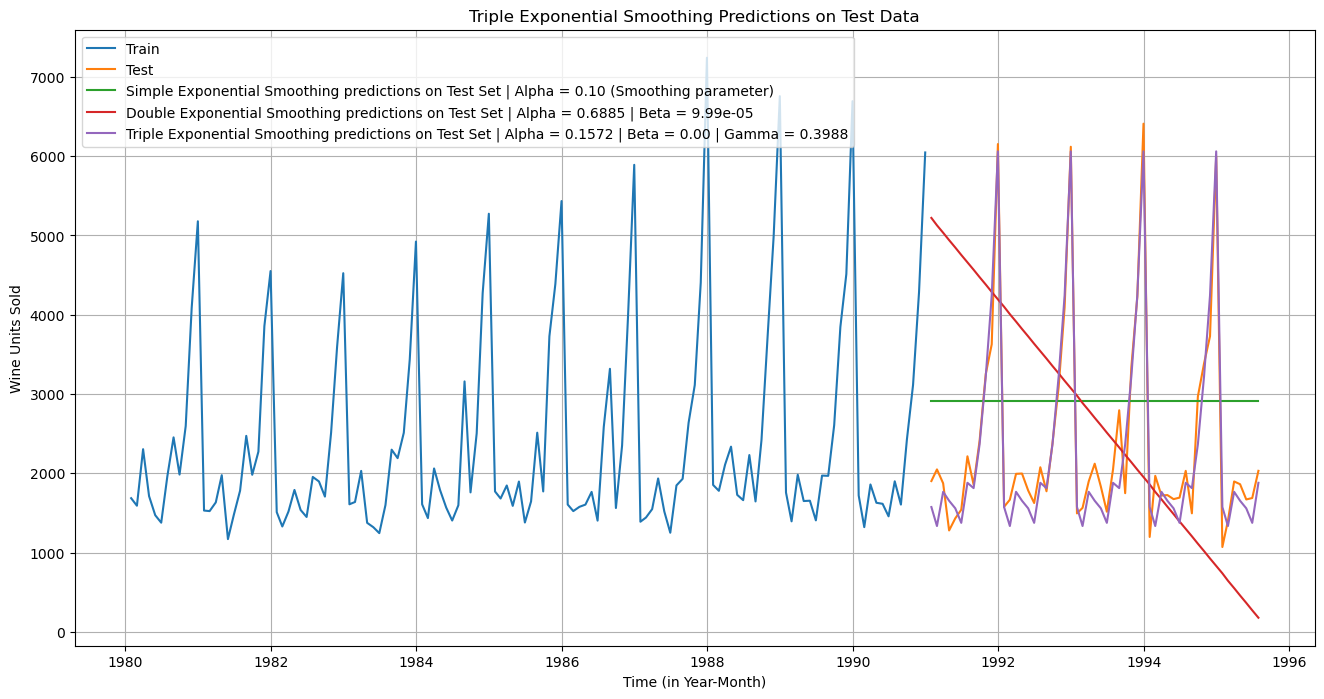

In [136]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(16,8))

plt.plot(tes_train['SparklingWine_Sales'], label='Train')
plt.plot(tes_test['SparklingWine_Sales'], label='Test')

plt.plot(ses_test['SES_pred',0.1], label='Simple Exponential Smoothing predictions on Test Set | Alpha = 0.10 (Smoothing parameter)')
plt.plot(des_test['DES_pred'], label='Double Exponential Smoothing predictions on Test Set | Alpha = 0.6885 | Beta = 9.99e-05')
plt.plot(tes_test['TES_pred'], label='Triple Exponential Smoothing predictions on Test Set | Alpha = 0.1572 | Beta = 0.00 | Gamma = 0.3988')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.show();

### 9b. Triple Exponential Smoothing (Autofit) - Model Evaluation

In [138]:
rmse_tes = metrics.root_mean_squared_error(test['SparklingWine_Sales'],tes_test['TES_pred'])
print("For Triple Exponential Smoothing Model forecast (Alpha = 0.1572, Beta = 0.00 & Gamma = 0.3988) on the Test Data,  RMSE is %3.3f" %(rmse_tes))

For Triple Exponential Smoothing Model forecast (Alpha = 0.1572, Beta = 0.00 & Gamma = 0.3988) on the Test Data,  RMSE is 318.831


In [139]:
df_rmse_tes = pd.DataFrame({'Test RMSE': [rmse_tes]},index=['Triple Exponential Smoothing (autofit) | Alpha = 0.1572 | Beta = 0.00 | Gamma = 0.3988'])

df_rmse = pd.concat([df_rmse, df_rmse_tes])
df_rmse

Test RMSE
Linear Regression                                   1386.836243
Naive Model                                         3864.279352
Simple Average                                      1275.081804
Moving Average - 2 point Trailing                    813.400684
Moving Average - 4 point Trailing                   1156.589694
Moving Average - 6 point Trailing                   1283.927428
Moving Average - 9 point Trailing                   1346.278315
Simple Exponential Smoothing (autofit) | Alpha ...  1304.927405
Simple Exponential Smoothing (manual) | Alpha =...  1375.393398
Double Exponential Smoothing (autofit) | Alpha ...  2007.238526
Double Exponential Smoothing (manual) | Alpha =...  1418.407668
Triple Exponential Smoothing (autofit) | Alpha ...   318.831018

### 10a. Triple Exponential Smoothing (Manual) - Model Building

In [141]:
df_rmse_tes_manual = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Test RMSE': []})
df_rmse_tes_manual

Empty DataFrame
Columns: [Alpha, Beta, Gamma, Test RMSE]
Index: []

In [142]:
%%time
tes_model = ExponentialSmoothing(tes_train['SparklingWine_Sales'],seasonal='multiplicative',initialization_method='estimated', freq='M')
for i in np.arange(0.1,1.05,0.05):
    for j in np.arange(0,0.1,0.02):
        for k in np.arange(0.1,1.05,0.05):      
            tes_manual = tes_model.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            tes_test['TES_pred',i,j,k] = tes_manual.forecast(len(test))
            rmse_tes_manual = metrics.root_mean_squared_error(des_test['SparklingWine_Sales'], tes_test['TES_pred',i,j,k])
            df_tes_manual_temp = pd.DataFrame({'Alpha': i,'Beta': j,'Gamma': k,'Test RMSE': rmse_tes_manual},index=[k])
            df_rmse_tes_manual = pd.concat([df_rmse_tes_manual, df_tes_manual_temp])

df_rmse_tes_manual

CPU times: total: 34 s
Wall time: 38.3 s


Alpha  Beta  Gamma    Test RMSE
0.10    0.1  0.00   0.10   337.434735
0.15    0.1  0.00   0.15   317.328844
0.20    0.1  0.00   0.20   306.602013
0.25    0.1  0.00   0.25   302.911684
0.30    0.1  0.00   0.30   303.994492
...     ...   ...    ...          ...
0.80    1.0  0.08   0.80  1068.871603
0.85    1.0  0.08   0.85  1318.274158
0.90    1.0  0.08   0.90  1555.834478
0.95    1.0  0.08   0.95  1627.365375
1.00    1.0  0.08   1.00  1333.442772

[1805 rows x 4 columns]

In [143]:
print('Top 5 Alpha-Beta-Gamma Values with least RMSE:-\n')
df_rmse_tes_manual.sort_values(by=['Test RMSE']).head()

Top 5 Alpha-Beta-Gamma Values with least RMSE:-



Alpha  Beta  Gamma   Test RMSE
0.25    0.1  0.00   0.25  302.911684
0.25    0.1  0.04   0.25  302.911684
0.25    0.1  0.06   0.25  302.911684
0.25    0.1  0.08   0.25  302.911684
0.25    0.1  0.02   0.25  302.911684

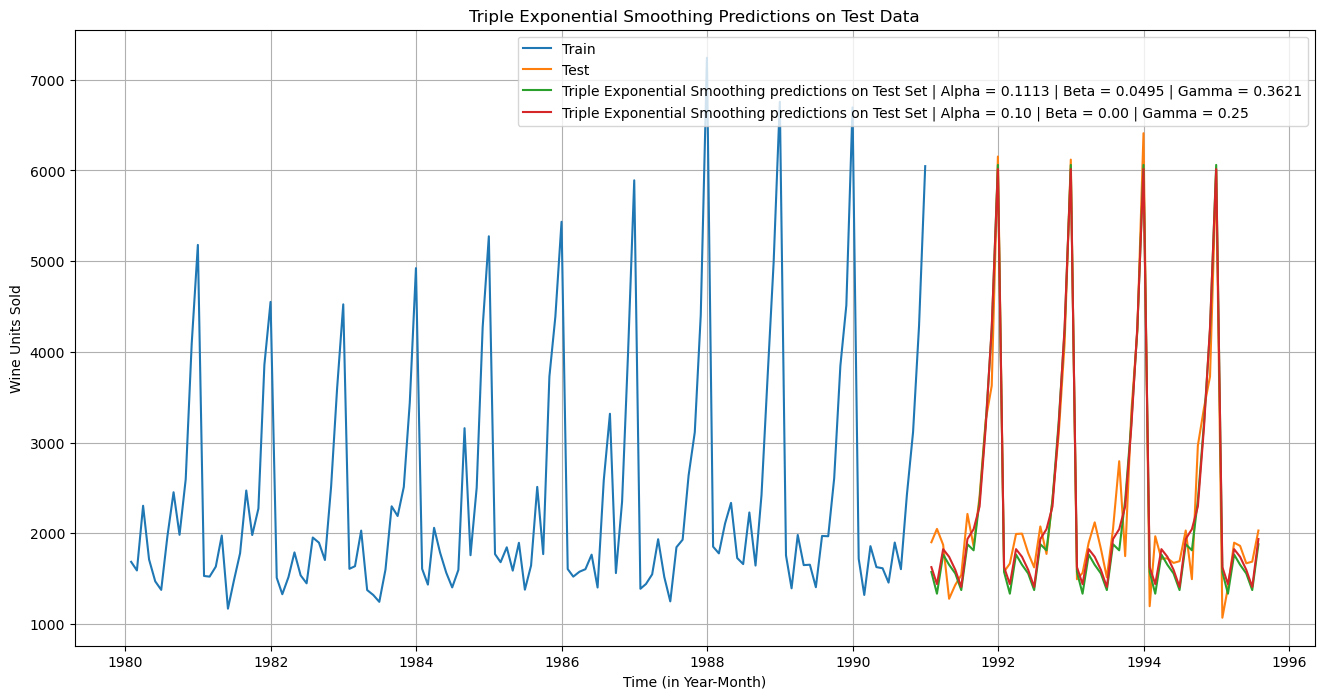

In [144]:
# Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

# Fitting the model again with Alpha = 0.10, Beta = 0.00 & Gamma = 0.25, since it has the least RMSE
tes_manual_i_j = tes_model.fit(smoothing_level=0.10,smoothing_trend=0.00,smoothing_seasonal=0.25,optimized=False,use_brute=True)
tes_test['TES_pred',0.10,0.00,0.25] = tes_manual_i_j.forecast(steps=len(test))

plt.figure(figsize=(16,8))

plt.plot(tes_train['SparklingWine_Sales'], label='Train')
plt.plot(tes_test['SparklingWine_Sales'], label='Test')

#plt.plot(ses_test['SES_pred',0.1], label='Simple Exponential Smoothing predictions on Test Set | Alpha = 0.10 (Smoothing parameter)')
#plt.plot(des_test['DES_pred'], label='Double Exponential Smoothing predictions on Test Set | Alpha = 1.4901 | Beta = 1.6610')
plt.plot(tes_test['TES_pred'], label='Triple Exponential Smoothing predictions on Test Set | Alpha = 0.1113 | Beta = 0.0495 | Gamma = 0.3621')
plt.plot(tes_test['TES_pred',0.10,0.00,0.25], label='Triple Exponential Smoothing predictions on Test Set | Alpha = 0.10 | Beta = 0.00 | Gamma = 0.25')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.show();

### 10b. Triple Exponential Smoothing (Manual) - Model Evaluation

In [146]:
rmse_tes_manual = metrics.root_mean_squared_error(test['SparklingWine_Sales'],tes_test['TES_pred',0.10,0.00,0.25])
print("For Triple Exponential Smoothing Model forecast (Alpha = 0.10, Beta = 0.00 & Gamma = 0.25) on the Test Data,  RMSE is %3.3f" %(rmse_tes_manual))

For Triple Exponential Smoothing Model forecast (Alpha = 0.10, Beta = 0.00 & Gamma = 0.25) on the Test Data,  RMSE is 302.912


In [147]:
df_rmse_tes_manual = pd.DataFrame({'Test RMSE': [rmse_tes_manual]},index=['Triple Exponential Smoothing (manual) | Alpha = 0.10 | Beta = 0.00 | Gamma = 0.25'])

df_rmse = pd.concat([df_rmse, df_rmse_tes_manual])
df_rmse

Test RMSE
Linear Regression                                   1386.836243
Naive Model                                         3864.279352
Simple Average                                      1275.081804
Moving Average - 2 point Trailing                    813.400684
Moving Average - 4 point Trailing                   1156.589694
Moving Average - 6 point Trailing                   1283.927428
Moving Average - 9 point Trailing                   1346.278315
Simple Exponential Smoothing (autofit) | Alpha ...  1304.927405
Simple Exponential Smoothing (manual) | Alpha =...  1375.393398
Double Exponential Smoothing (autofit) | Alpha ...  2007.238526
Double Exponential Smoothing (manual) | Alpha =...  1418.407668
Triple Exponential Smoothing (autofit) | Alpha ...   318.831018
Triple Exponential Smoothing (manual) | Alpha =...   302.911684

# Check for Stationarity

In [149]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

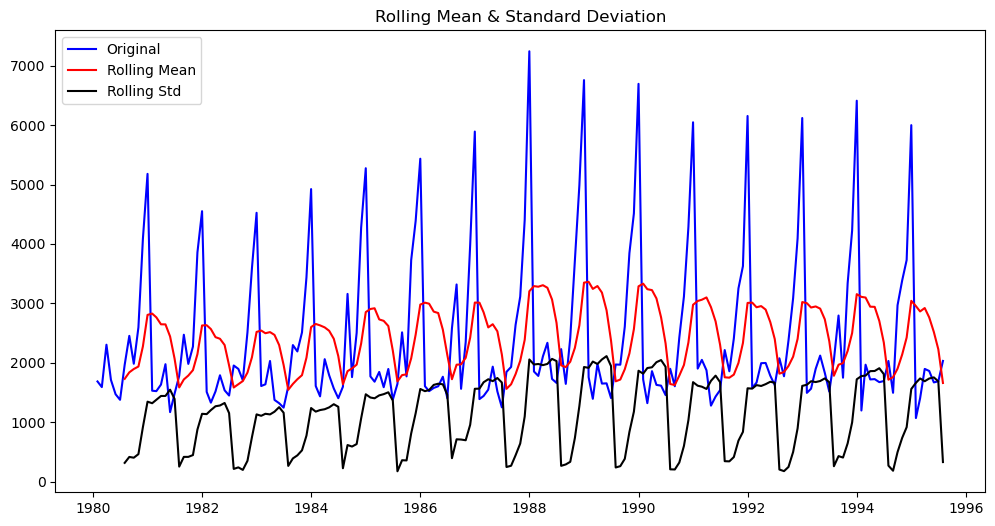

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [150]:
# Test stationarity on complete dataset
test_stationarity(df['SparklingWine_Sales'])

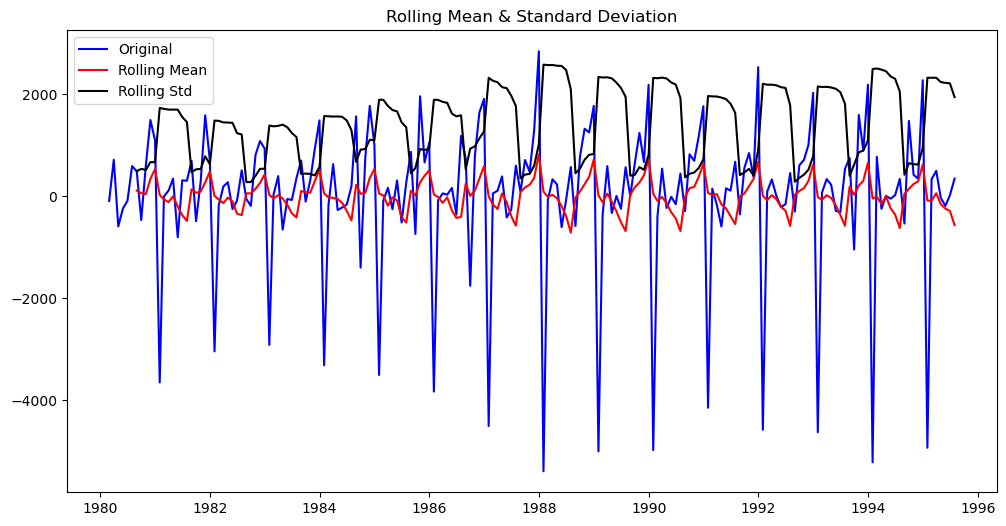

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [151]:
# Take a difference of order 1 and check whether the Time Series is stationary for complete dataset i.e. p-value < Alpha (5%)

test_stationarity(df['SparklingWine_Sales'].diff().dropna())

# Now it is stationary

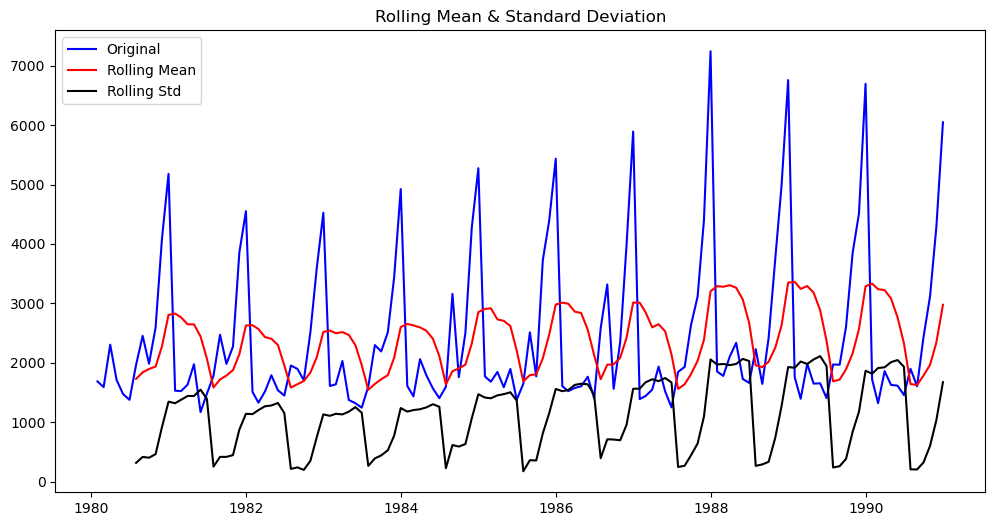

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [152]:
# Test stationarity on Train dataset
test_stationarity(train['SparklingWine_Sales'])

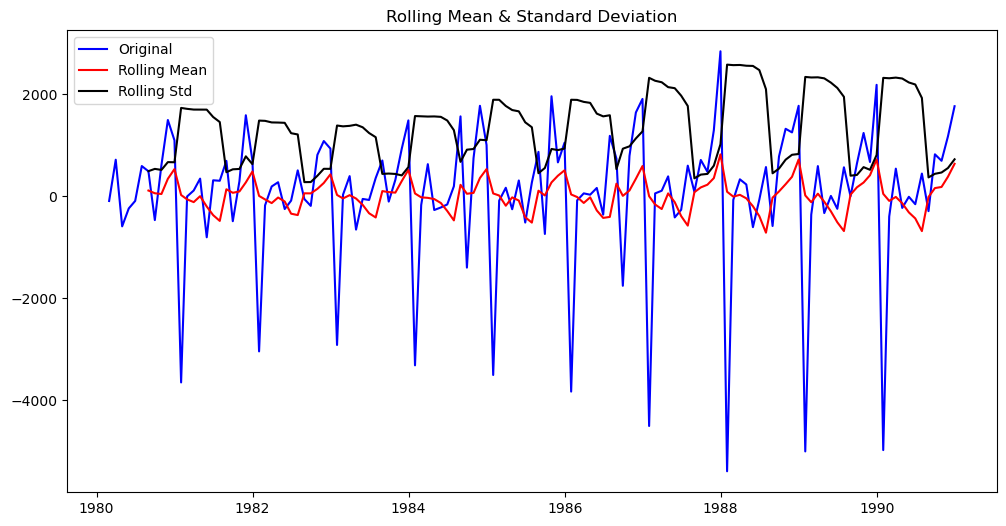

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [153]:
# Take a difference of order 1 and check whether the Time Series is stationary for Train dataset i.e. p-value < Alpha (5%)

test_stationarity(train['SparklingWine_Sales'].diff().dropna())

# Now it is stationary

# Model Building - Stationary Data

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

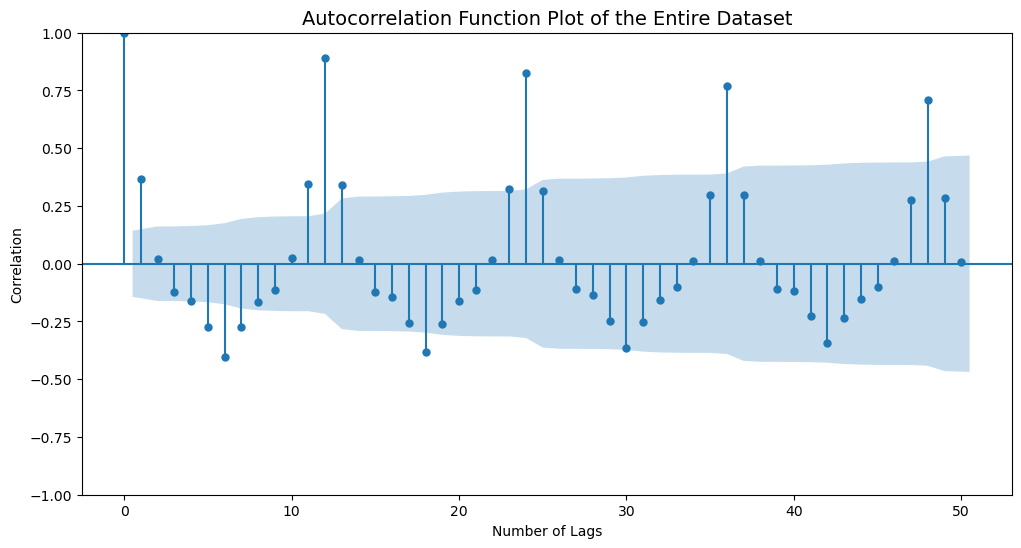

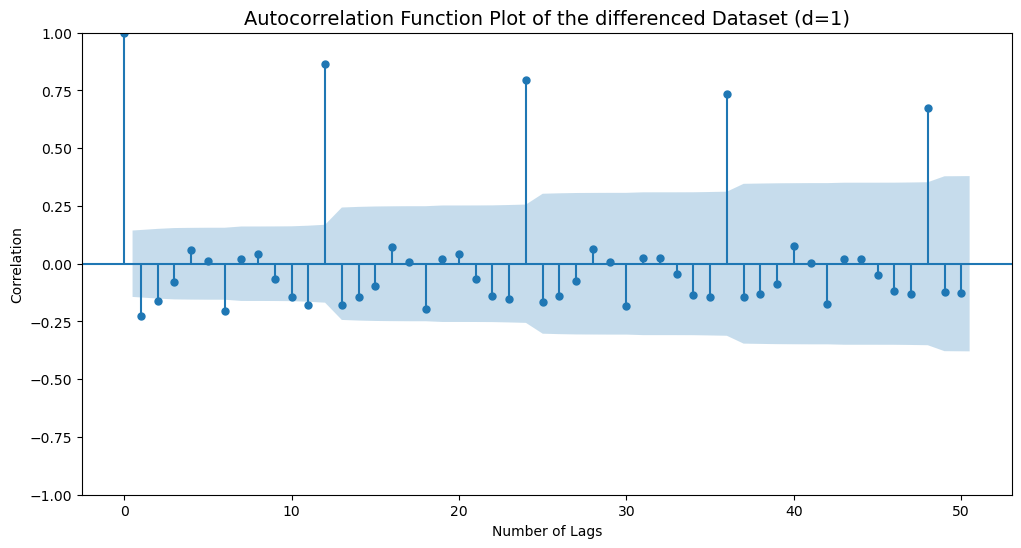

In [156]:
plot_acf(df,alpha=0.05,lags=50);
plt.title('Autocorrelation Function Plot of the Entire Dataset', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show();

plot_acf(df.diff().dropna(),alpha=0.05,lags=50);
plt.title('Autocorrelation Function Plot of the differenced Dataset (d=1)', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show();

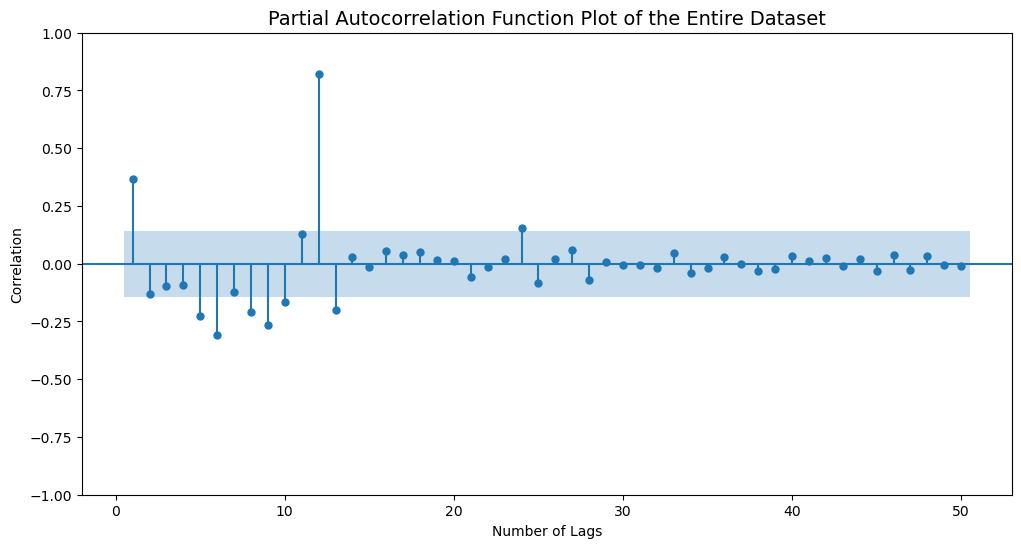

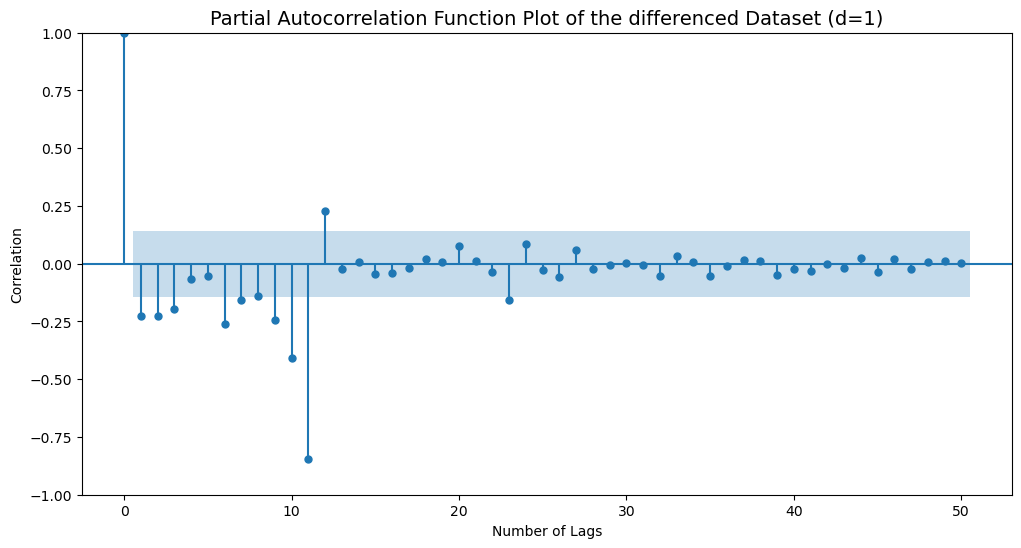

In [157]:
plot_pacf(df,zero=False,alpha=0.05,lags=50);
plt.title('Partial Autocorrelation Function Plot of the Entire Dataset', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show();

plot_pacf(df.diff().dropna(),alpha=0.05,lags=50);
plt.title('Partial Autocorrelation Function Plot of the differenced Dataset (d=1)', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show();

### 1a. Auto ARIMA - Model Building

In [159]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 5
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [160]:
# Creating an empty Dataframe with column names only
df_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
df_ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [161]:
from statsmodels.tsa.arima.model import ARIMA

i = 0
for param in pdq:   # running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['SparklingWine_Sales'].values,order=param).fit()
    #print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    df_ARIMA_AIC_temp = pd.DataFrame({'param': [param],'AIC': [ARIMA_model.aic]}, index=[i])
    df_ARIMA_AIC = pd.concat([df_ARIMA_AIC, df_ARIMA_AIC_temp])
    i = i+1

df_ARIMA_AIC

param          AIC
0   (0, 1, 0)  2267.663036
1   (0, 1, 1)  2263.060016
2   (0, 1, 2)  2234.408323
3   (0, 1, 3)  2233.994858
4   (0, 1, 4)  2235.173736
5   (1, 1, 0)  2266.608539
6   (1, 1, 1)  2235.755095
7   (1, 1, 2)  2234.527200
8   (1, 1, 3)  2235.607813
9   (1, 1, 4)  2227.736977
10  (2, 1, 0)  2260.365744
11  (2, 1, 1)  2233.777626
12  (2, 1, 2)  2213.509213
13  (2, 1, 3)  2232.880709
14  (2, 1, 4)  2222.921832
15  (3, 1, 0)  2257.723379
16  (3, 1, 1)  2235.498926
17  (3, 1, 2)  2230.775985
18  (3, 1, 3)  2221.436801
19  (3, 1, 4)  2220.209574
20  (4, 1, 0)  2259.741841
21  (4, 1, 1)  2237.073054
22  (4, 1, 2)  2233.076725
23  (4, 1, 3)  2222.904096
24  (4, 1, 4)  2214.059617

In [162]:
# Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

df_ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
12  (2, 1, 2)  2213.509213
24  (4, 1, 4)  2214.059617
19  (3, 1, 4)  2220.209574
18  (3, 1, 3)  2221.436801
23  (4, 1, 3)  2222.904096

In [163]:
# Build ARIMA model with parameters (2,1,2) with the least AIC as shown above
ARIMA_auto = ARIMA(train, order=(2,1,2))
ARIMA_auto_model = ARIMA_auto.fit()

print(ARIMA_auto_model.summary())

                                SARIMAX Results                                
Dep. Variable:     SparklingWine_Sales   No. Observations:                  132
Model:                  ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                 Wed, 09 Apr 2025   AIC                           2213.509
Time:                         18:54:27   BIC                           2227.885
Sample:                     01-31-1980   HQIC                          2219.351
                          - 12-31-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.216 

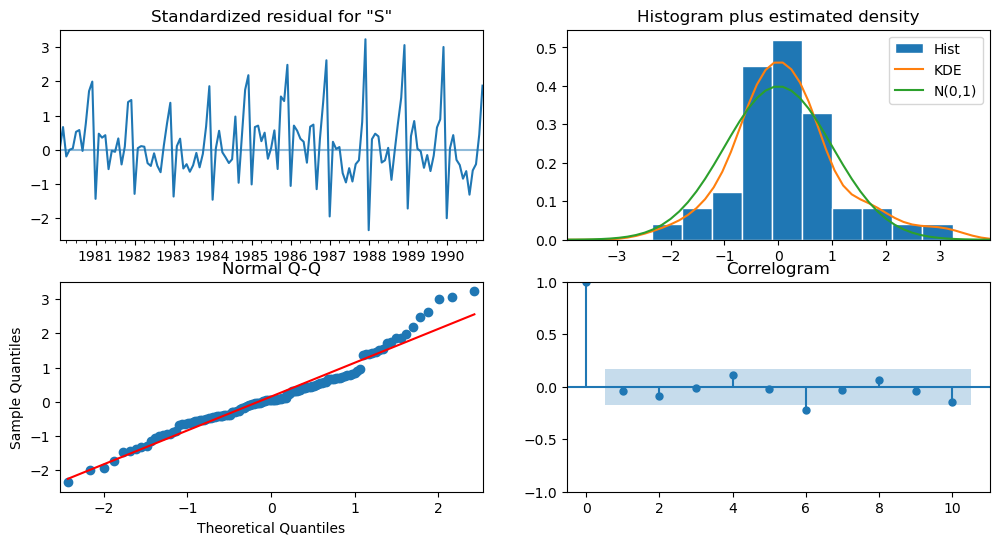

In [164]:
# Diagnostics Plot

ARIMA_auto_model.plot_diagnostics();

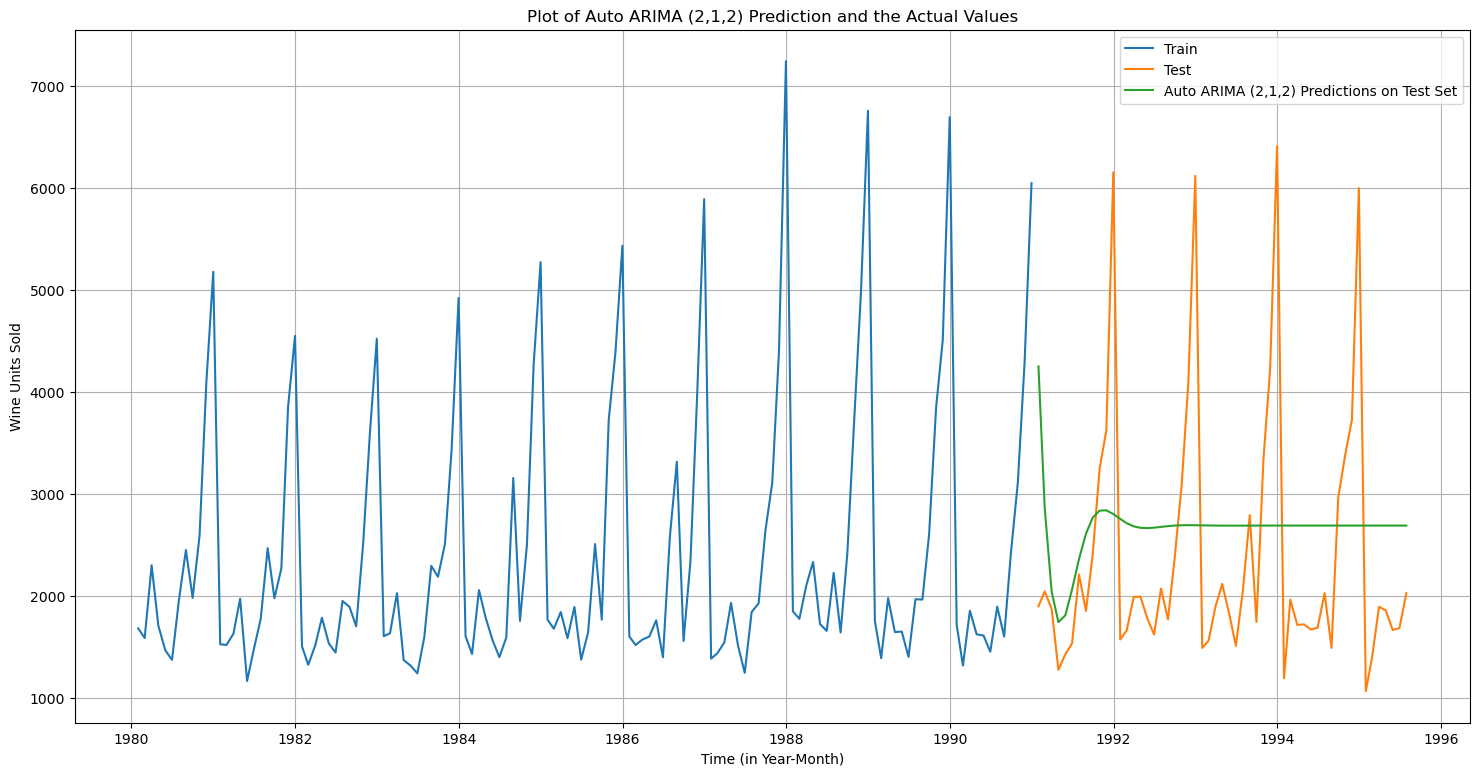

In [165]:
## Plotting on both the Training and Test using autofit

ARIMA_auto_train = train.copy()
ARIMA_auto_test = test.copy()

ARIMA_auto_test['ARIMA_auto_pred'] = ARIMA_auto_model.forecast(steps=len(test))

plt.figure(figsize=(18,9))
plt.plot(train['SparklingWine_Sales'], label='Train')
plt.plot(test['SparklingWine_Sales'], label='Test')

plt.plot(ARIMA_auto_test['ARIMA_auto_pred'], label='Auto ARIMA (2,1,2) Predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Auto ARIMA (2,1,2) Prediction and the Actual Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.show();

### 1b. Auto ARIMA - Model Evaluation

In [167]:
rmse_ARIMA_auto = metrics.root_mean_squared_error(test['SparklingWine_Sales'],ARIMA_auto_test['ARIMA_auto_pred'])
print("For Auto ARIMA (2,1,2) on the Test Data,  RMSE is %3.3f" %(rmse_ARIMA_auto))

For Auto ARIMA (2,1,2) on the Test Data,  RMSE is 1299.980


In [168]:
df_rmse_ARIMA_auto = pd.DataFrame({'Test RMSE': [rmse_ARIMA_auto]},index=['Auto ARIMA (2,1,2)'])

df_rmse = pd.concat([df_rmse, df_rmse_ARIMA_auto])
df_rmse

Test RMSE
Linear Regression                                   1386.836243
Naive Model                                         3864.279352
Simple Average                                      1275.081804
Moving Average - 2 point Trailing                    813.400684
Moving Average - 4 point Trailing                   1156.589694
Moving Average - 6 point Trailing                   1283.927428
Moving Average - 9 point Trailing                   1346.278315
Simple Exponential Smoothing (autofit) | Alpha ...  1304.927405
Simple Exponential Smoothing (manual) | Alpha =...  1375.393398
Double Exponential Smoothing (autofit) | Alpha ...  2007.238526
Double Exponential Smoothing (manual) | Alpha =...  1418.407668
Triple Exponential Smoothing (autofit) | Alpha ...   318.831018
Triple Exponential Smoothing (manual) | Alpha =...   302.911684
Auto ARIMA (2,1,2)                                  1299.979756

### 2a. Manual ARIMA - Model Building

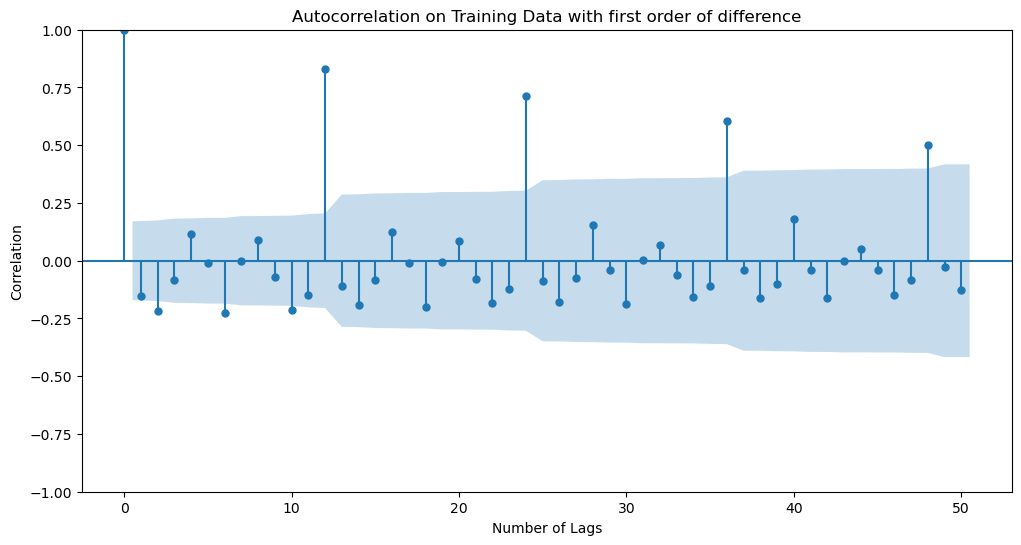

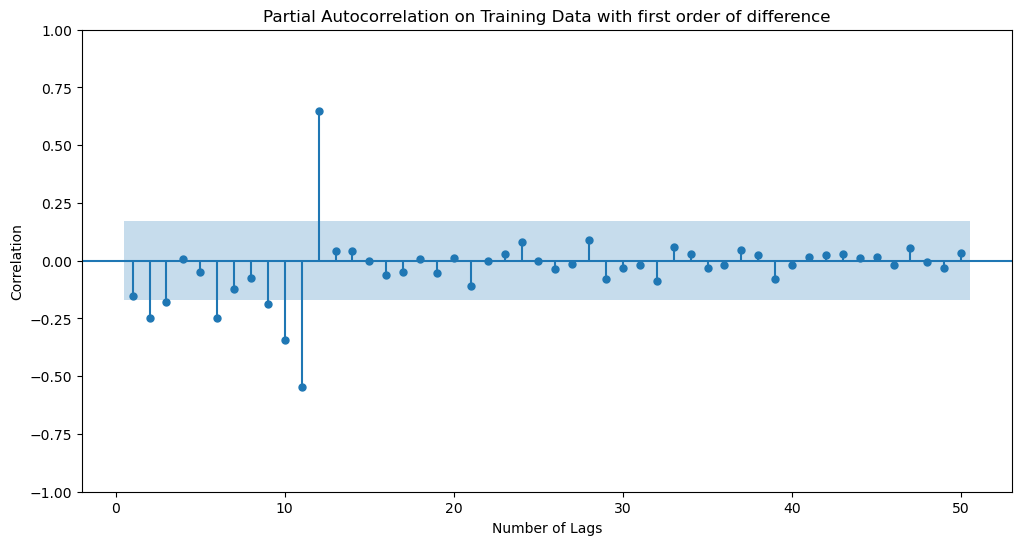

In [170]:
#Plot ACF & PACF again on Train dataset with d=1
plot_acf(train.diff(),title='Autocorrelation on Training Data with first order of difference',missing='drop',lags=50)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

plot_pacf(train.diff().dropna(),title='Partial Autocorrelation on Training Data with first order of difference',lags=50,zero=False,method='ywmle')
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

In [171]:
# By Manual inspection, suggested parameters are (4,1,3)

ARIMA_manual = ARIMA(train, order=(4,1,3))
ARIMA_manual_model = ARIMA_manual.fit()

print(ARIMA_manual_model.summary())

                                SARIMAX Results                                
Dep. Variable:     SparklingWine_Sales   No. Observations:                  132
Model:                  ARIMA(4, 1, 3)   Log Likelihood               -1103.452
Date:                 Wed, 09 Apr 2025   AIC                           2222.904
Time:                         18:54:32   BIC                           2245.906
Sample:                     01-31-1980   HQIC                          2232.251
                          - 12-31-1990                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4570      0.192      2.383      0.017       0.081       0.833
ar.L2         -0.9591      0.325     -2.953      0.003      -1.596      -0.323
ar.L3          0.4640      0.179      2.593 

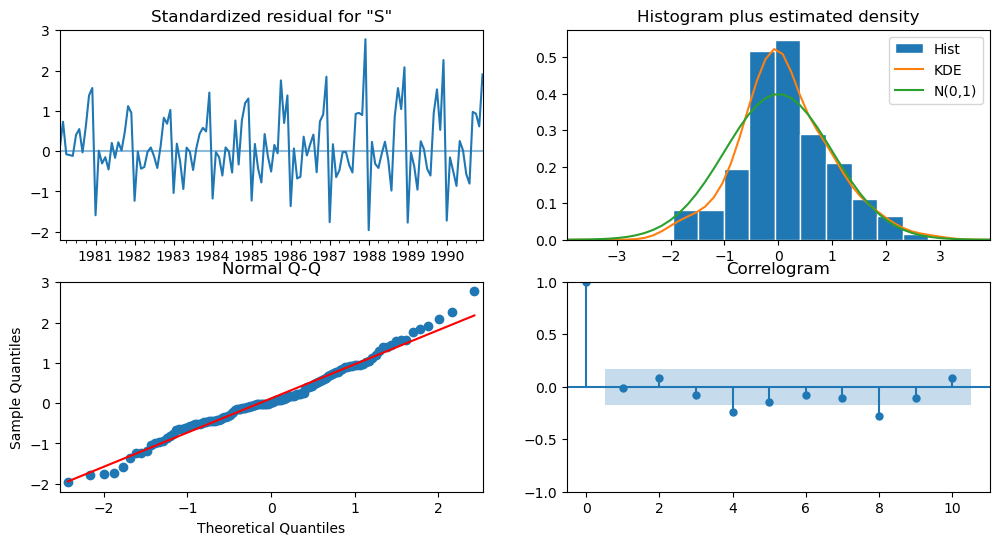

In [172]:
# Diagnostics Plot

ARIMA_manual_model.plot_diagnostics();

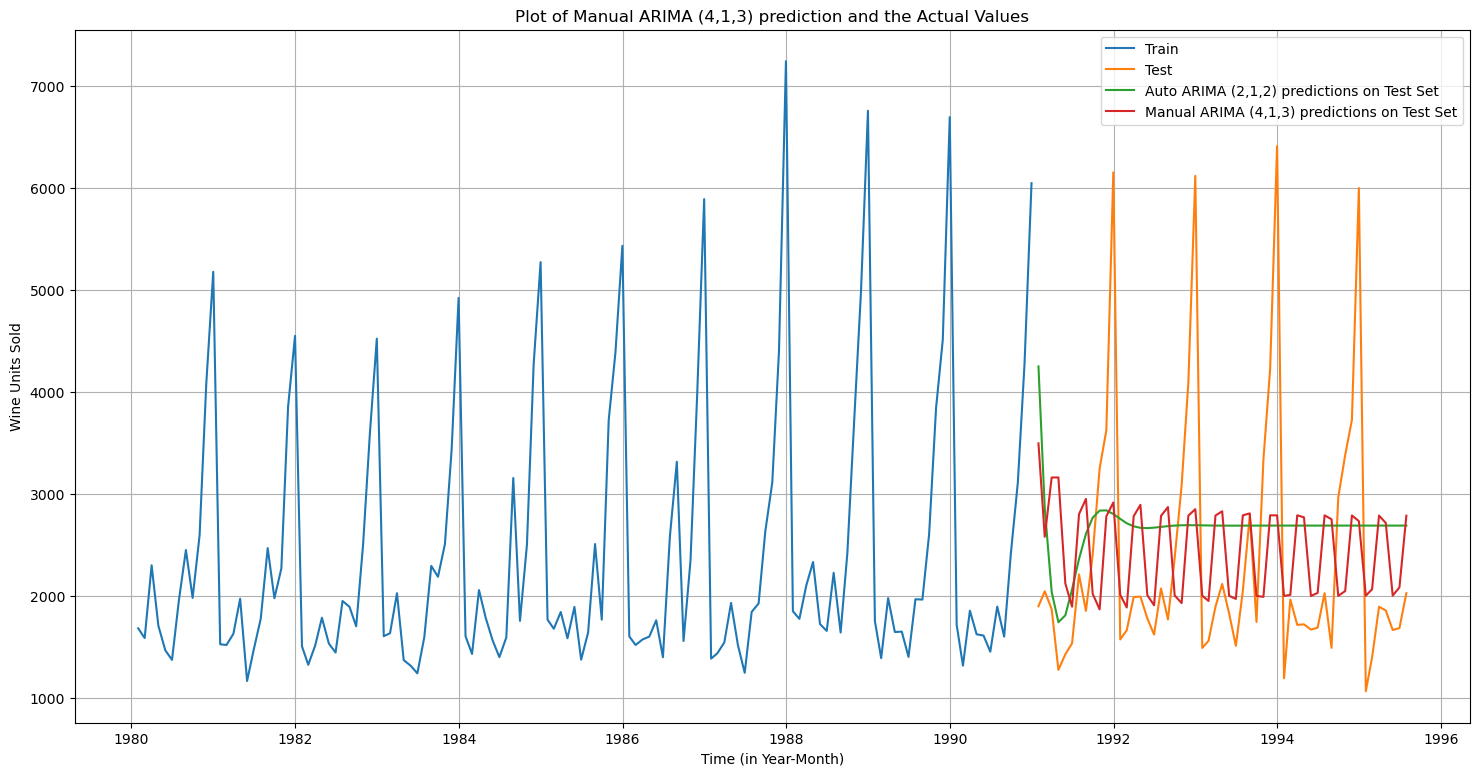

In [173]:
## Plotting on both the Training and Test using autofit

ARIMA_manual_train = train.copy()
ARIMA_manual_test = test.copy()

ARIMA_manual_test['ARIMA_manual_pred'] = ARIMA_manual_model.forecast(steps=len(test))

plt.figure(figsize=(18,9))
plt.plot(train['SparklingWine_Sales'], label='Train')
plt.plot(test['SparklingWine_Sales'], label='Test')

plt.plot(ARIMA_auto_test['ARIMA_auto_pred'], label='Auto ARIMA (2,1,2) predictions on Test Set')
plt.plot(ARIMA_manual_test['ARIMA_manual_pred'], label='Manual ARIMA (4,1,3) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Manual ARIMA (4,1,3) prediction and the Actual Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.show();

### 2b. Manual ARIMA - Model Evaluation

In [175]:
rmse_ARIMA_manual = metrics.root_mean_squared_error(test['SparklingWine_Sales'],ARIMA_manual_test['ARIMA_manual_pred'])
print("For Manual ARIMA (4,1,3) on the Test Data,  RMSE is %3.3f" %(rmse_ARIMA_manual))

For Manual ARIMA (4,1,3) on the Test Data,  RMSE is 1232.597


In [176]:
df_rmse_ARIMA_manual = pd.DataFrame({'Test RMSE': [rmse_ARIMA_manual]},index=['Manual ARIMA (4,1,3)'])

df_rmse = pd.concat([df_rmse, df_rmse_ARIMA_manual])
df_rmse

Test RMSE
Linear Regression                                   1386.836243
Naive Model                                         3864.279352
Simple Average                                      1275.081804
Moving Average - 2 point Trailing                    813.400684
Moving Average - 4 point Trailing                   1156.589694
Moving Average - 6 point Trailing                   1283.927428
Moving Average - 9 point Trailing                   1346.278315
Simple Exponential Smoothing (autofit) | Alpha ...  1304.927405
Simple Exponential Smoothing (manual) | Alpha =...  1375.393398
Double Exponential Smoothing (autofit) | Alpha ...  2007.238526
Double Exponential Smoothing (manual) | Alpha =...  1418.407668
Triple Exponential Smoothing (autofit) | Alpha ...   318.831018
Triple Exponential Smoothing (manual) | Alpha =...   302.911684
Auto ARIMA (2,1,2)                                  1299.979756
Manual ARIMA (4,1,3)                                1232.597198

### 3a. Auto SARIMA - Model Building

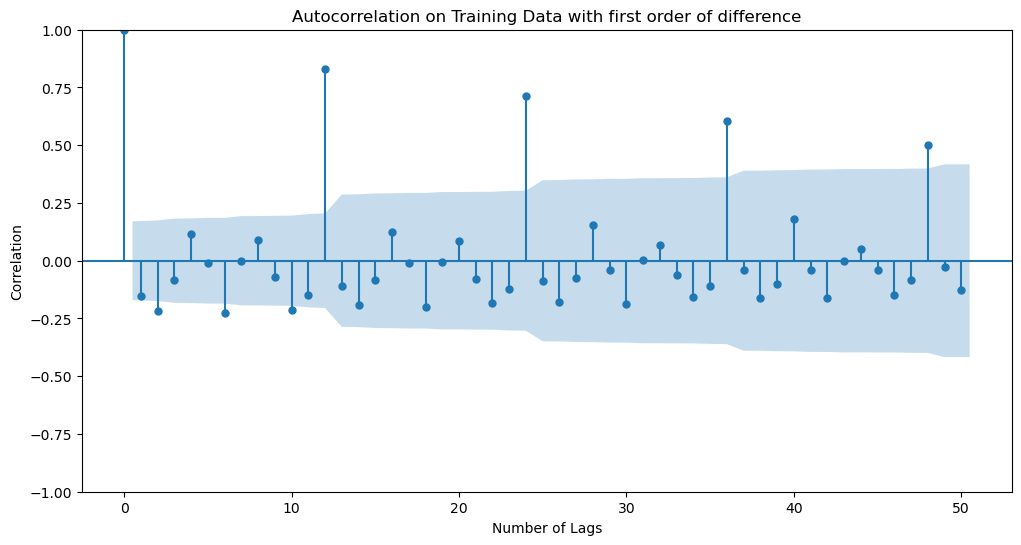

In [178]:
#Plot ACF again on Train dataset with d=1 to check seasonality
plot_acf(train.diff(),title='Autocorrelation on Training Data with first order of difference',missing='drop',lags=50)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

In [179]:
# We showed earlier that d = 1 makes the series stationary. Hence, D = 0 (as series is already stationary at d = 1)
# Clearly S = 12 as we see a pattern (spike) repeating after 12 months

# Below are the various combinations of SARIMA paramter combinations

import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [180]:
df_SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
df_SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [181]:
%%time
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_auto = sm.tsa.statespace.SARIMAX(train['SparklingWine_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)        
        results_SARIMA = SARIMA_auto.fit()
        df_SARIMA_AIC_temp = pd.DataFrame({'param': [param],'seasonal': [param_seasonal],'AIC': [results_SARIMA.aic]})
        print(df_SARIMA_AIC_temp)
        df_SARIMA_AIC = pd.concat([df_SARIMA_AIC, df_SARIMA_AIC_temp])

df_SARIMA_AIC

       param       seasonal         AIC
0  (0, 1, 0)  (0, 0, 0, 12)  2251.35972
       param       seasonal          AIC
0  (0, 1, 0)  (0, 0, 1, 12)  1956.261462
       param       seasonal          AIC
0  (0, 1, 0)  (0, 0, 2, 12)  1723.153364
       param       seasonal          AIC
0  (0, 1, 0)  (0, 0, 3, 12)  3979.248258
       param       seasonal          AIC
0  (0, 1, 0)  (1, 0, 0, 12)  1837.436602
       param       seasonal         AIC
0  (0, 1, 0)  (1, 0, 1, 12)  1806.99053
       param       seasonal          AIC
0  (0, 1, 0)  (1, 0, 2, 12)  1633.210874
       param       seasonal          AIC
0  (0, 1, 0)  (1, 0, 3, 12)  2729.062211
       param       seasonal          AIC
0  (0, 1, 0)  (2, 0, 0, 12)  1648.377615
       param       seasonal          AIC
0  (0, 1, 0)  (2, 0, 1, 12)  1647.205416
       param       seasonal          AIC
0  (0, 1, 0)  (2, 0, 2, 12)  1630.989805
       param       seasonal          AIC
0  (0, 1, 0)  (2, 0, 3, 12)  6435.463095
       param       s

param       seasonal          AIC
0   (0, 1, 0)  (0, 0, 0, 12)  2251.359720
0   (0, 1, 0)  (0, 0, 1, 12)  1956.261462
0   (0, 1, 0)  (0, 0, 2, 12)  1723.153364
0   (0, 1, 0)  (0, 0, 3, 12)  3979.248258
0   (0, 1, 0)  (1, 0, 0, 12)  1837.436602
..        ...            ...          ...
0   (3, 1, 3)  (2, 0, 3, 12)  6541.622390
0   (3, 1, 3)  (3, 0, 0, 12)  1468.261273
0   (3, 1, 3)  (3, 0, 1, 12)  1508.333821
0   (3, 1, 3)  (3, 0, 2, 12)  1512.967141
0   (3, 1, 3)  (3, 0, 3, 12)   624.421189

[256 rows x 3 columns]

In [182]:
df_SARIMA_AIC.sort_values(by=['AIC']).iloc[26:31]

param       seasonal          AIC
0  (3, 1, 2)  (3, 0, 0, 12)  1403.770703
0  (2, 1, 0)  (3, 0, 0, 12)  1411.944973
0  (2, 1, 0)  (3, 0, 1, 12)  1413.101762
0  (1, 1, 2)  (3, 0, 0, 12)  1413.810247
0  (2, 1, 0)  (3, 0, 2, 12)  1414.199455

In [183]:
# The model is throwing errors with values before (3,1,2)(3,0,0,12). So, we select this one to build the model

SARIMA_auto_final = sm.tsa.statespace.SARIMAX(train['SparklingWine_Sales'],
                                order=(3,1,2),
                                seasonal_order=(3,0,0,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_auto = SARIMA_auto_final.fit(maxiter=1000)
print(results_SARIMA_auto.summary())

                                      SARIMAX Results                                      
Dep. Variable:                 SparklingWine_Sales   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(3, 0, [], 12)   Log Likelihood                -684.617
Date:                             Wed, 09 Apr 2025   AIC                           1387.235
Time:                                     19:15:20   BIC                           1409.931
Sample:                                 01-31-1980   HQIC                          1396.395
                                      - 12-31-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5375      0.338     -1.588      0.112      -1.201       0.126
ar.L2          0.0255      

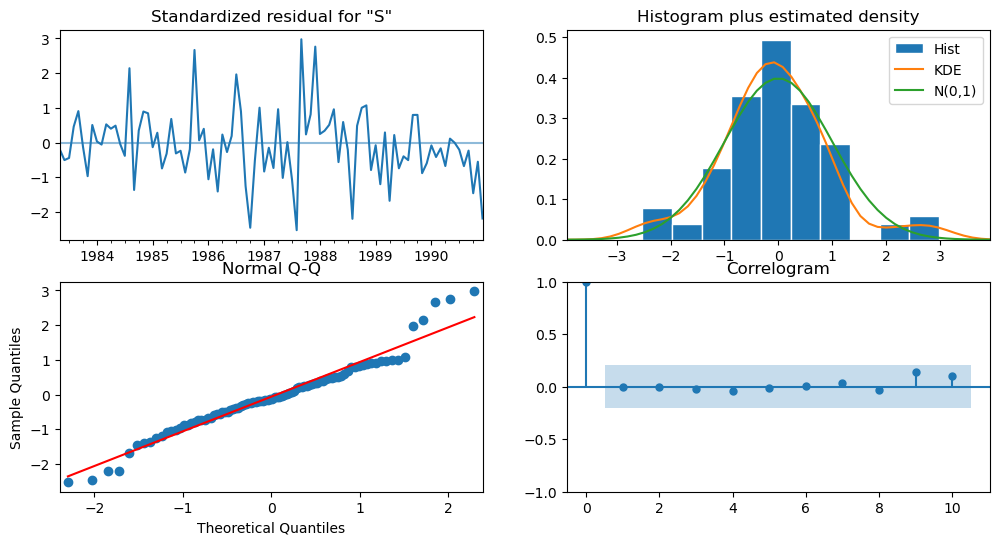

In [184]:
results_SARIMA_auto.plot_diagnostics();

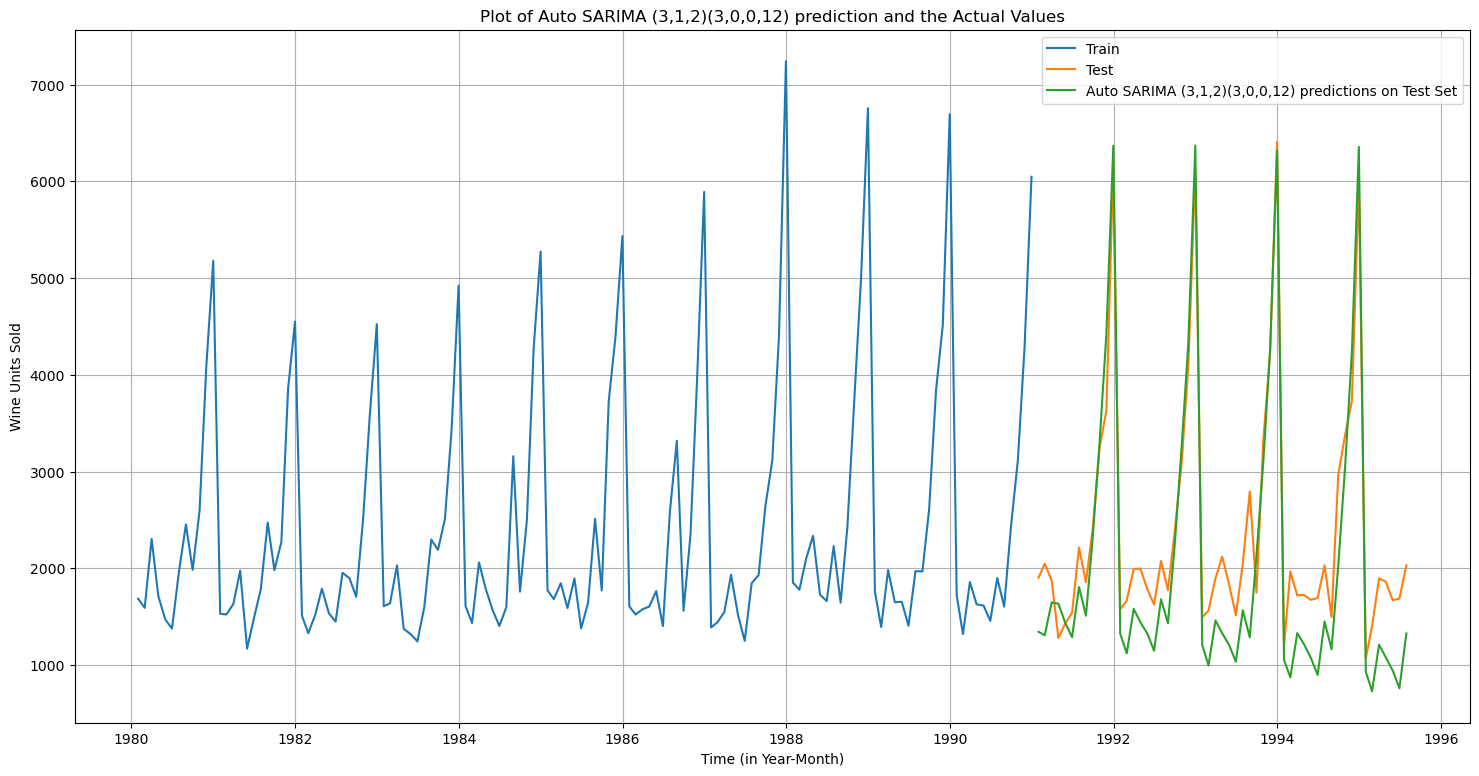

In [185]:
## Plotting on both the Training and Test using autofit

SARIMA_auto_train = train.copy()
SARIMA_auto_test = test.copy()

SARIMA_auto_test['SARIMA_auto_pred'] = results_SARIMA_auto.forecast(steps=len(test))

plt.figure(figsize=(18,9))
plt.plot(train['SparklingWine_Sales'], label='Train')
plt.plot(test['SparklingWine_Sales'], label='Test')

plt.plot(SARIMA_auto_test['SARIMA_auto_pred'], label='Auto SARIMA (3,1,2)(3,0,0,12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Auto SARIMA (3,1,2)(3,0,0,12) prediction and the Actual Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.show();

### 3b. Auto SARIMA - Model Evaluation

In [187]:
rmse_SARIMA_auto = metrics.root_mean_squared_error(test['SparklingWine_Sales'],SARIMA_auto_test['SARIMA_auto_pred'])
print("For Auto SARIMA (3,1,2)(3,0,0,12) forecast on the Test Data,  RMSE is %3.3f" %(rmse_SARIMA_auto))

For Auto SARIMA (3,1,2)(3,0,0,12) forecast on the Test Data,  RMSE is 543.242


In [188]:
df_rmse_SARIMA_auto = pd.DataFrame({'Test RMSE': [rmse_SARIMA_auto]},index=['Auto SARIMA (3,1,2)(3,0,0,12)'])

df_rmse = pd.concat([df_rmse, df_rmse_SARIMA_auto])
df_rmse

Test RMSE
Linear Regression                                   1386.836243
Naive Model                                         3864.279352
Simple Average                                      1275.081804
Moving Average - 2 point Trailing                    813.400684
Moving Average - 4 point Trailing                   1156.589694
Moving Average - 6 point Trailing                   1283.927428
Moving Average - 9 point Trailing                   1346.278315
Simple Exponential Smoothing (autofit) | Alpha ...  1304.927405
Simple Exponential Smoothing (manual) | Alpha =...  1375.393398
Double Exponential Smoothing (autofit) | Alpha ...  2007.238526
Double Exponential Smoothing (manual) | Alpha =...  1418.407668
Triple Exponential Smoothing (autofit) | Alpha ...   318.831018
Triple Exponential Smoothing (manual) | Alpha =...   302.911684
Auto ARIMA (2,1,2)                                  1299.979756
Manual ARIMA (4,1,3)                                1232.597198
Auto SARIMA (3,1,2)(3,0,0,12)                        543.242254

### 4a. Manual SARIMA - Model Building

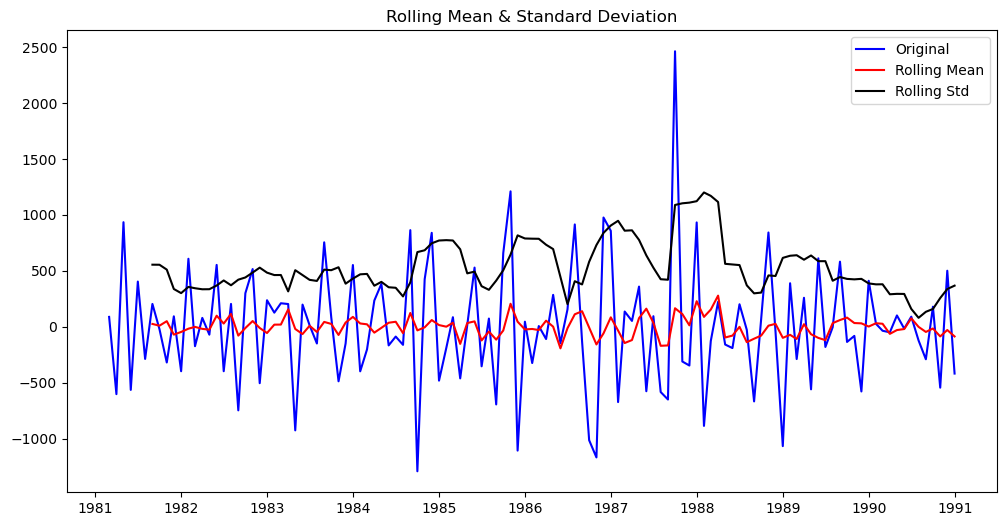

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [190]:
# We know at d=1, the train data set is stationary
# By looking at first order differenced ACF & PACF, there seems to be seasonality at an interval of 12. So, lets choose S = 12
# Lets test for stationarity with d=1, D=1, S=12 on the dataset (Time series with seasonal differencing followed by normal differencing)

test_stationarity((train['SparklingWine_Sales'].diff(12).dropna()).diff().dropna())

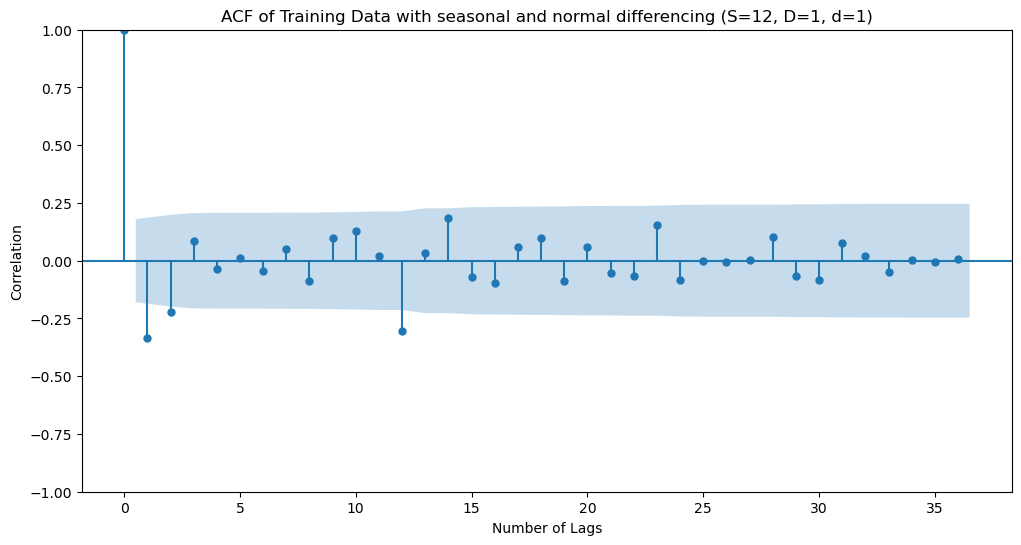

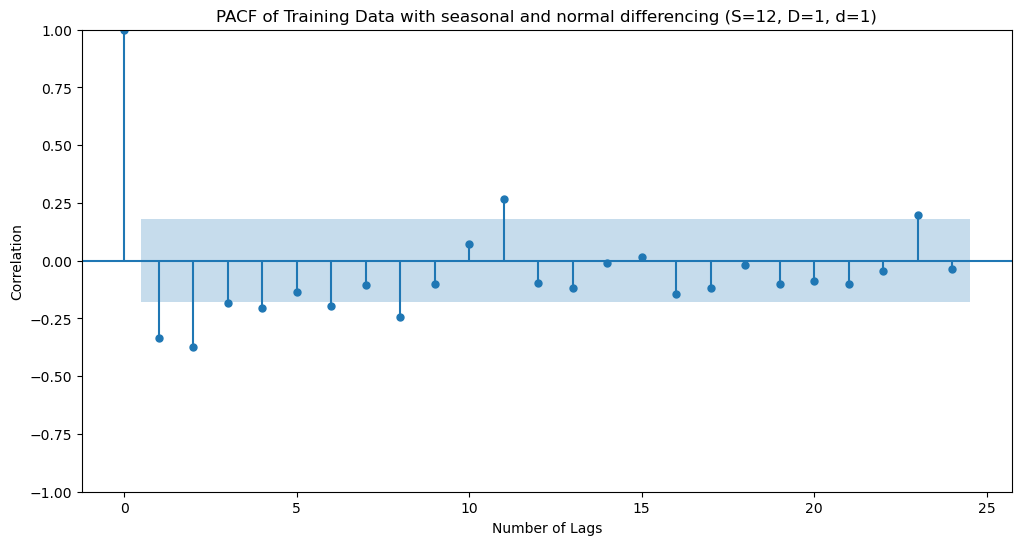

In [191]:
# Plot ACF and the PACF once more with seasonal and normal differencing on train data

plot_acf((train['SparklingWine_Sales'].diff(12).dropna()).diff().dropna(),title='ACF of Training Data with seasonal and normal differencing (S=12, D=1, d=1)',lags=36)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

plot_pacf((train['SparklingWine_Sales'].diff(12).dropna()).diff().dropna(),title='PACF of Training Data with seasonal and normal differencing (S=12, D=1, d=1)',lags=24)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

In [192]:
# We have taken alpha = 0.05 and seasonal period as 12 (S=12)
# PACF: Till lag 4 is significant before cut-off, so AR i.e. p = 4. 
# PACF: At seasonal lag of 12, it cuts off, so Seasonal AR i.e. P = 0
# ACF: Till lag 1 and 2 are significant before it cuts off, so MA i.e. q = 2. 
# ACF: At seasonal lag of 12, a significant lag is can be seen and no significant seaonal lags after 24, so Seasonal AR i.e. Q = 1
# The final selected terms for SARIMA model is (4, 1, 2)x(0, 1, 1, 12), as inferred from the ACF and PACF plots.

import statsmodels.api as sm

SARIMA_manual = sm.tsa.statespace.SARIMAX(train['SparklingWine_Sales'],
                                order=(4,1,2),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_manual = SARIMA_manual.fit(maxiter=1000)
print(results_SARIMA_manual.summary())

                                      SARIMAX Results                                       
Dep. Variable:                  SparklingWine_Sales   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -771.377
Date:                              Wed, 09 Apr 2025   AIC                           1558.755
Time:                                      19:15:27   BIC                           1579.910
Sample:                                  01-31-1980   HQIC                          1567.325
                                       - 12-31-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1794      0.593     -0.303      0.762      -1.341       0.982
ar.L2         -0.08

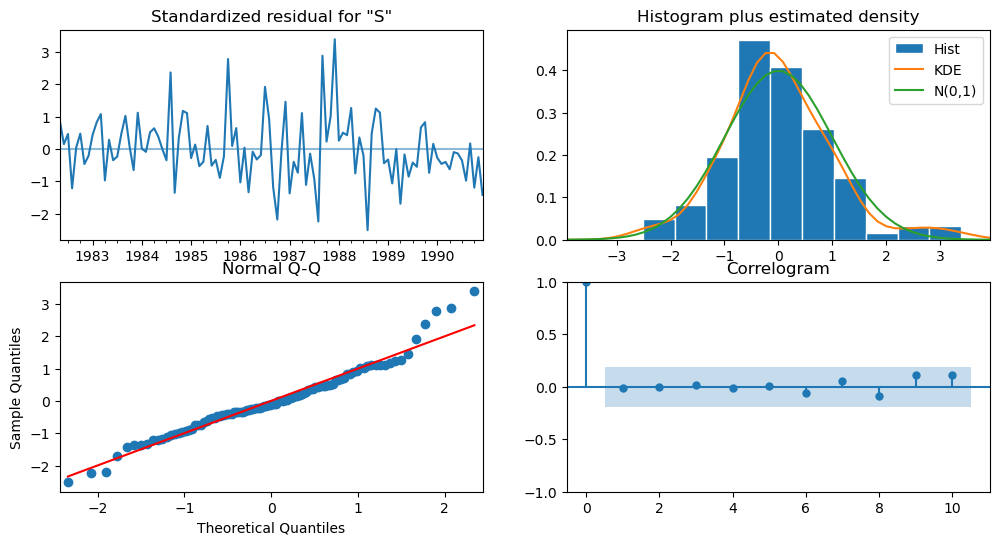

In [193]:
results_SARIMA_manual.plot_diagnostics();

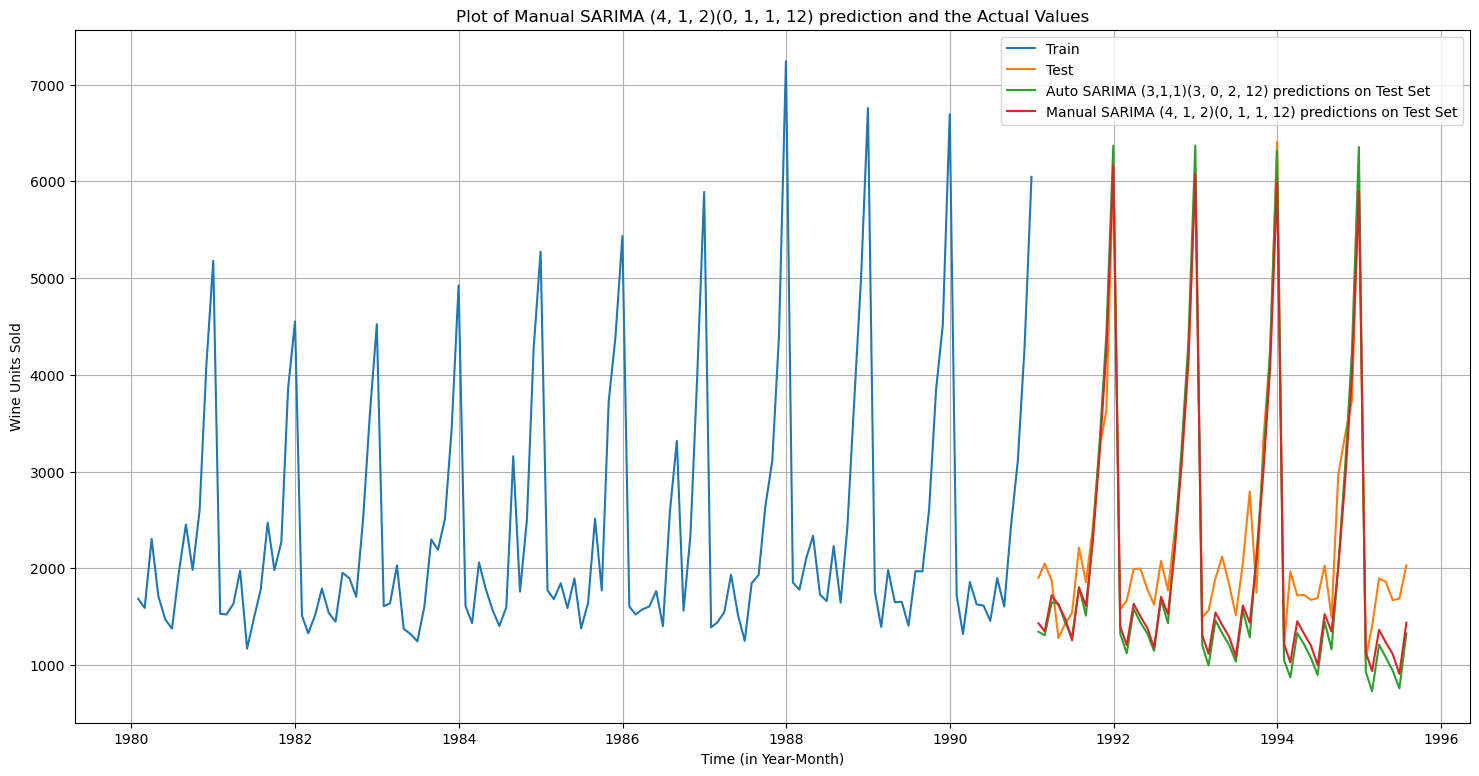

In [194]:
## Plotting on both the Training and Test using autofit

SARIMA_manual_train = train.copy()
SARIMA_manual_test = test.copy()

SARIMA_manual_test['SARIMA_manual_pred'] = results_SARIMA_manual.forecast(steps=len(test))

plt.figure(figsize=(18,9))
plt.plot(train['SparklingWine_Sales'], label='Train')
plt.plot(test['SparklingWine_Sales'], label='Test')

plt.plot(SARIMA_auto_test['SARIMA_auto_pred'], label='Auto SARIMA (3,1,1)(3, 0, 2, 12) predictions on Test Set')
plt.plot(SARIMA_manual_test['SARIMA_manual_pred'], label='Manual SARIMA (4, 1, 2)(0, 1, 1, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Manual SARIMA (4, 1, 2)(0, 1, 1, 12) prediction and the Actual Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.show();

### 4b. Manual SARIMA - Model Evaluation

In [196]:
rmse_SARIMA_manual = metrics.root_mean_squared_error(test['SparklingWine_Sales'],SARIMA_manual_test['SARIMA_manual_pred'])
print("For Manual SARIMA (4,1,2)(0,1,1,12) forecast on the Test Data,  RMSE is %3.3f" %(rmse_SARIMA_manual))

For Manual SARIMA (4,1,2)(0,1,1,12) forecast on the Test Data,  RMSE is 468.682


In [197]:
df_rmse_SARIMA_manual = pd.DataFrame({'Test RMSE': [rmse_SARIMA_manual]},index=['Manual SARIMA (4,1,2)(0,1,1,12)'])

df_rmse = pd.concat([df_rmse, df_rmse_SARIMA_manual])
df_rmse

Test RMSE
Linear Regression                                   1386.836243
Naive Model                                         3864.279352
Simple Average                                      1275.081804
Moving Average - 2 point Trailing                    813.400684
Moving Average - 4 point Trailing                   1156.589694
Moving Average - 6 point Trailing                   1283.927428
Moving Average - 9 point Trailing                   1346.278315
Simple Exponential Smoothing (autofit) | Alpha ...  1304.927405
Simple Exponential Smoothing (manual) | Alpha =...  1375.393398
Double Exponential Smoothing (autofit) | Alpha ...  2007.238526
Double Exponential Smoothing (manual) | Alpha =...  1418.407668
Triple Exponential Smoothing (autofit) | Alpha ...   318.831018
Triple Exponential Smoothing (manual) | Alpha =...   302.911684
Auto ARIMA (2,1,2)                                  1299.979756
Manual ARIMA (4,1,3)                                1232.597198
Auto SARIMA (3,1,2)(3,0,0,12)                        543.242254
Manual SARIMA (4,1,2)(0,1,1,12)                      468.681644

# Compare the Performance of the model & Forecast

### RMSE Comparison Table of all the models

In [200]:
df_rmse.rename(columns={'Test RMSE':'RMSE'},inplace=True)
df_rmse.sort_values(by='RMSE',ascending=True)

RMSE
Triple Exponential Smoothing (manual) | Alpha =...   302.911684
Triple Exponential Smoothing (autofit) | Alpha ...   318.831018
Manual SARIMA (4,1,2)(0,1,1,12)                      468.681644
Auto SARIMA (3,1,2)(3,0,0,12)                        543.242254
Moving Average - 2 point Trailing                    813.400684
Moving Average - 4 point Trailing                   1156.589694
Manual ARIMA (4,1,3)                                1232.597198
Simple Average                                      1275.081804
Moving Average - 6 point Trailing                   1283.927428
Auto ARIMA (2,1,2)                                  1299.979756
Simple Exponential Smoothing (autofit) | Alpha ...  1304.927405
Moving Average - 9 point Trailing                   1346.278315
Simple Exponential Smoothing (manual) | Alpha =...  1375.393398
Linear Regression                                   1386.836243
Double Exponential Smoothing (manual) | Alpha =...  1418.407668
Double Exponential Smoothing (autofit) | Alpha ...  2007.238526
Naive Model                                         3864.279352

### Most Optimum Model (least RMSE) - Triple Exponential Smoothing Model (Alpha = 0.10 | Beta = 0.00 | Gamma = 0.25)

In [202]:
tes_final = ExponentialSmoothing(df['SparklingWine_Sales'],trend='additive',seasonal='multiplicative',freq='M').fit(smoothing_level=0.10, smoothing_trend=0.00, smoothing_seasonal=0.25)

In [203]:
tes_final.params

{'smoothing_level': 0.1,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': 0.25,
 'damping_trend': nan,
 'initial_level': 2356.3655442540025,
 'initial_trend': 0.8359448201869769,
 'initial_seasons': array([0.79086386, 0.7652567 , 0.94969844, 0.87656335, 0.81371731,
        0.74266526, 0.96739807, 1.19908029, 1.06268518, 1.33785076,
        1.99168205, 2.61707748]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [364]:
rmse_tes_final = metrics.root_mean_squared_error(df['SparklingWine_Sales'],tes_final.fittedvalues)
print("For Total Exponential Smoothing (Alpha = 0.10 | Beta = 0.00 | Gamma = 0.25) forecast on the Full Data,  RMSE is %3.3f" %(rmse_tes_final))

For Total Exponential Smoothing (Alpha = 0.10 | Beta = 0.00 | Gamma = 0.25) forecast on the Full Data,  RMSE is 354.356


In [205]:
# Getting the predictions for the 12 months into the future
prediction = tes_final.forecast(steps=12)
print('Forecast of next 12 months:-\n')
prediction.tail(12)

Forecast of next 12 months:-



1995-08-31    1966.341594
1995-09-30    2375.376435
1995-10-31    3216.738557
1995-11-30    3993.855527
1995-12-31    6085.378194
1996-01-31    1402.901270
1996-02-29    1633.345905
1996-03-31    1870.459606
1996-04-30    1826.695007
1996-05-31    1676.516930
1996-06-30    1583.246265
1996-07-31    2014.109714
Freq: ME, dtype: float64

<Figure size 1800x900 with 0 Axes>

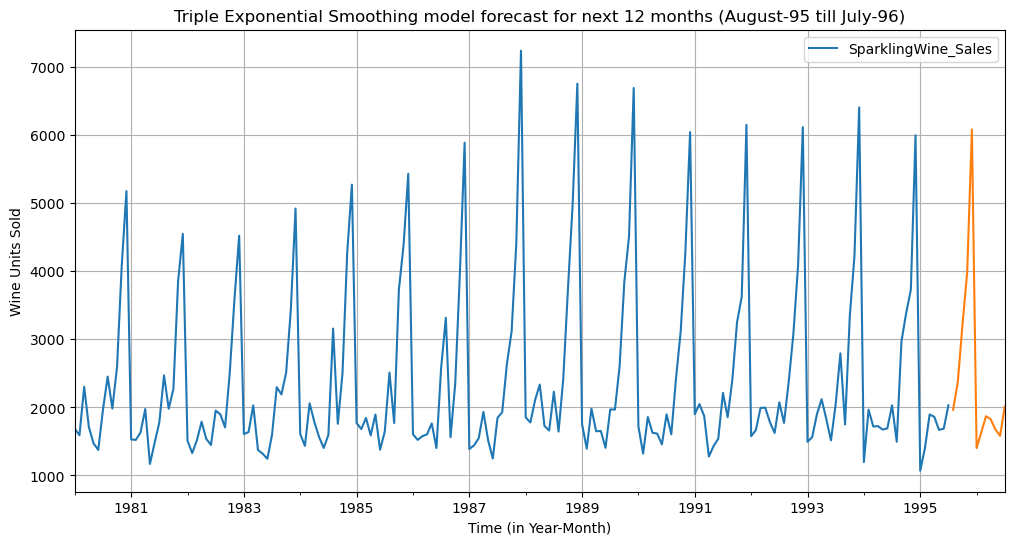

In [206]:
plt.figure(figsize=(18,9))
df.plot();
prediction.plot();
plt.title('Triple Exponential Smoothing model forecast for next 12 months (August-95 till July-96)')
plt.legend(loc='best')
plt.grid();
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.show();

In [207]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
predicted_df = pd.DataFrame({'lower_ci':prediction - (1.96*np.std(tes_final.resid,ddof=1)),
                          'prediction':prediction,
                          'upper_ci': prediction + (1.96*np.std(tes_final.resid,ddof=1))})
predicted_df.head(12)

lower_ci   prediction     upper_ci
1995-08-31  1270.699014  1966.341594  2661.984175
1995-09-30  1679.733854  2375.376435  3071.019015
1995-10-31  2521.095976  3216.738557  3912.381137
1995-11-30  3298.212947  3993.855527  4689.498108
1995-12-31  5389.735613  6085.378194  6781.020774
1996-01-31   707.258689  1402.901270  2098.543850
1996-02-29   937.703324  1633.345905  2328.988485
1996-03-31  1174.817026  1870.459606  2566.102187
1996-04-30  1131.052426  1826.695007  2522.337587
1996-05-31   980.874350  1676.516930  2372.159510
1996-06-30   887.603684  1583.246265  2278.888845
1996-07-31  1318.467134  2014.109714  2709.752294

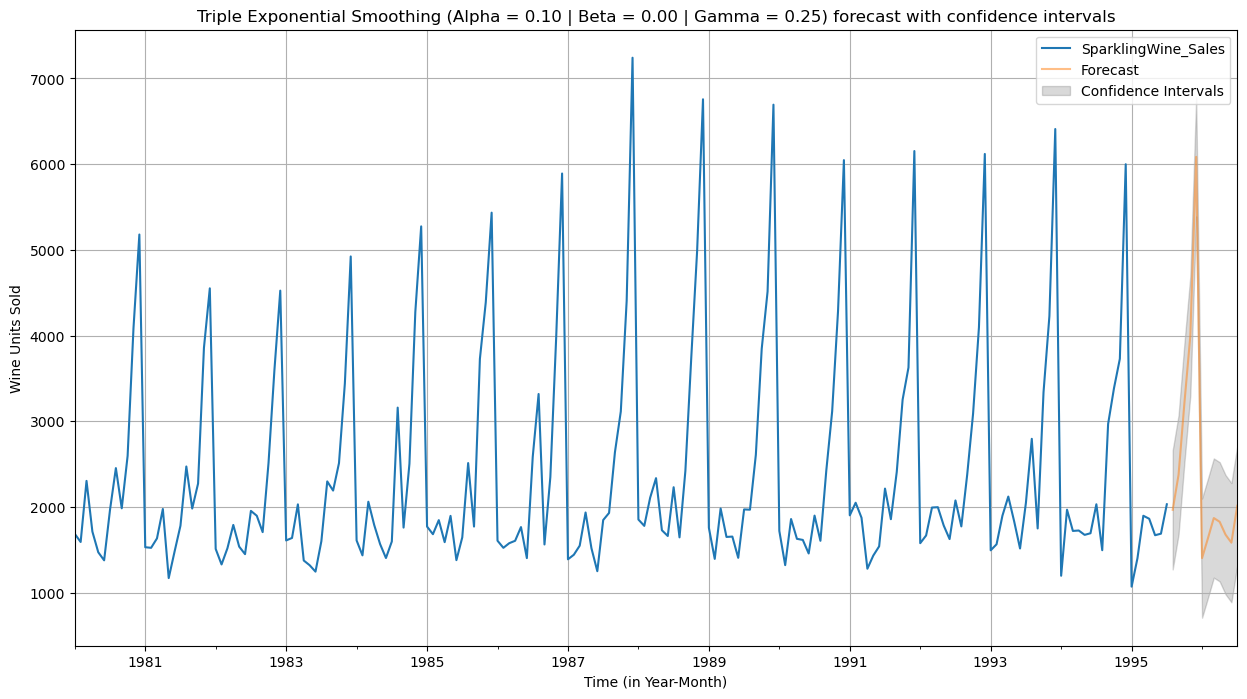

In [208]:
# plot the full data with forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
predicted_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(predicted_df.index, predicted_df['lower_ci'], predicted_df['upper_ci'], color='k', alpha=.15,label='Confidence Intervals')
plt.title('Triple Exponential Smoothing (Alpha = 0.10 | Beta = 0.00 | Gamma = 0.25) forecast with confidence intervals')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

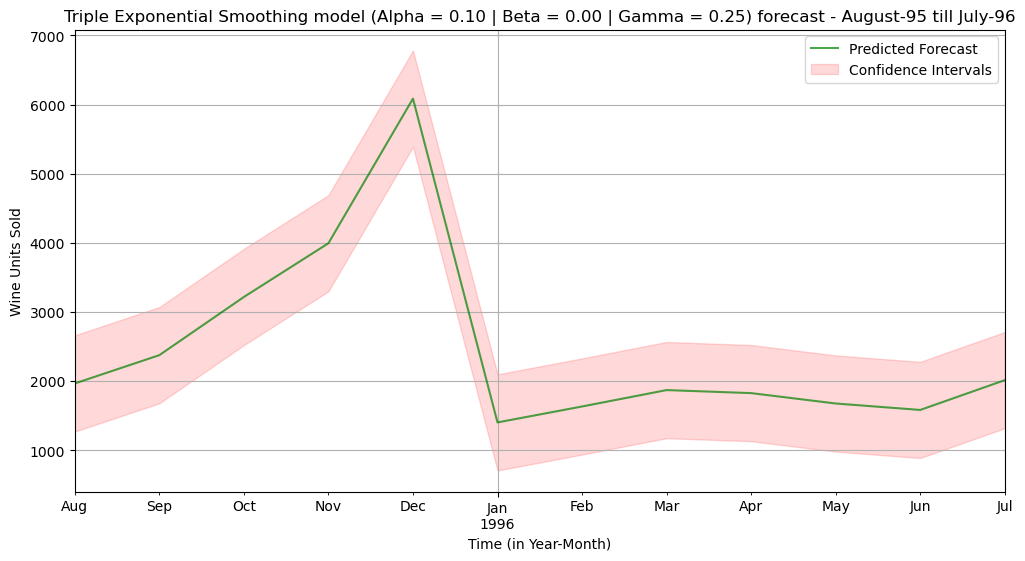

In [209]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,6))
axis = prediction.plot(color='Green', label='Predicted Forecast', alpha=0.7)
axis.fill_between(predicted_df.index, predicted_df['lower_ci'], predicted_df['upper_ci'], color='Red', alpha=.15, label='Confidence Intervals')
axis.set_title('Triple Exponential Smoothing model (Alpha = 0.10 | Beta = 0.00 | Gamma = 0.25) forecast - August-95 till July-96')
axis.set_xlabel('Time (in Year-Month)')
axis.set_ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

# Actionable Insights & Recommendations

In [211]:
# Please refer Business Report